In [1]:
# the purpose of this program is to parse through all the 
import math
import numpy as np
import pandas as pd
import random
import os
import json
import pprint
import tensorflow as tf
import re 
from pandas.io.json import json_normalize
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

from math import log
from math import sqrt
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

import statistics
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
#%%timeit
initial_path = "/data/data"
root_dir = os.listdir(initial_path)
list_of_json = []
counter_total = 0;
for dir in root_dir:
    curr_path = initial_path + "/" + dir + "/enrichment/cert_info"
    #print(curr_dir)
    if os.path.exists(curr_path):
        curr_dir = os.listdir(curr_path)
        for sub_json in curr_dir:
        #do i need the last /
            each_json = curr_path + "/" + sub_json
            print(each_json)
            ran =random.random()
            if(ran<.10):
                counter_total = counter_total+1
                #print('counter_total'+ str(counter_total))
                list_of_json.append(each_json)
    else:
        pass    
print('counter_total'+ str(counter_total))

/data/data/2019-02-23/enrichment/cert_info/5c71d8a0d276305f899a9b1d.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6a371f594929046d8f.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6b2d99fb66ca2575fa.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6c2d99fb66ca2575fb.json
/data/data/2019-02-23/enrichment/cert_info/5c71ddd7371f594929046d90.json
/data/data/2019-02-24/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfac98a4a2623a8d5378.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfbff481ce47ac6ff3e7.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd5371f597160a6345f.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd8027c1b786834fcae.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd92d99fb0fe333772d.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e77fdaa0372b3464fb.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e7e3e366147b4955c7.json
/data/data/2019-02-24/enrichment/cert_info/5c7221eb

/data/data/2019-02-27/enrichment/cert_info/0.json
/data/data/2019-02-27/enrichment/cert_info/1.json
/data/data/2019-02-27/enrichment/cert_info/2.json
/data/data/2019-02-27/enrichment/cert_info/3.json
/data/data/2019-02-27/enrichment/cert_info/4.json
/data/data/2019-02-27/enrichment/cert_info/5.json
/data/data/2019-02-27/enrichment/cert_info/594ac5f2577ea418dd13ca9b.json
/data/data/2019-02-27/enrichment/cert_info/596b2b15024176099dd0c47c.json
/data/data/2019-02-27/enrichment/cert_info/5b6473d411efb049171a3006.json
/data/data/2019-02-27/enrichment/cert_info/5ba32e36b1e7e1111dfebe67.json
/data/data/2019-02-27/enrichment/cert_info/5bde8dd2f290494b9c6ab996.json
/data/data/2019-02-27/enrichment/cert_info/5c04fa9e6b72151e41bb2cd7.json
/data/data/2019-02-27/enrichment/cert_info/5c0d04d744a86c4011d39bbb.json
/data/data/2019-02-27/enrichment/cert_info/5c50703c28f3f607b9340c54.json
/data/data/2019-02-27/enrichment/cert_info/5c57fed6d7c07877338787a4.json
/data/data/2019-02-27/enrichment/cert_info/

/data/data/2019-02-28/enrichment/cert_info/5b59c6f64f6fa1342067147a.json
/data/data/2019-02-28/enrichment/cert_info/5ba32ba165de3f447181c20a.json
/data/data/2019-02-28/enrichment/cert_info/5bf3af521127e826d623cfbd.json
/data/data/2019-02-28/enrichment/cert_info/5bff6e219f70a91e15da4c99.json
/data/data/2019-02-28/enrichment/cert_info/5c3f185c1a1d2c34ae91c5fc.json
/data/data/2019-02-28/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-28/enrichment/cert_info/5c6e33f153d9c86bb28c4819.json
/data/data/2019-02-28/enrichment/cert_info/5c6eb288c8b7d944b94c0759.json
/data/data/2019-02-28/enrichment/cert_info/5c7541333ca97a6fc1b409a5.json
/data/data/2019-02-28/enrichment/cert_info/5c756b5c3507fd0490105c41.json
/data/data/2019-02-28/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-02-28/enrichment/cert_info/5c756c4a51988b0536ac87cb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d237cdc9a0530533ddb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d55

/data/data/2019-03-01/enrichment/cert_info/0.json
/data/data/2019-03-01/enrichment/cert_info/1.json
/data/data/2019-03-01/enrichment/cert_info/2.json
/data/data/2019-03-01/enrichment/cert_info/3.json
/data/data/2019-03-01/enrichment/cert_info/4.json
/data/data/2019-03-01/enrichment/cert_info/5.json
/data/data/2019-03-01/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-01/enrichment/cert_info/5b7d1f9773a5857b953654be.json
/data/data/2019-03-01/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-01/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-01/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-01/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-01/enrichment/cert_info/5ba78d7465de3f629ef0fa8b.json
/data/data/2019-03-01/enrichment/cert_info/5bab8288920a874d42950c19.json
/data/data/2019-03-01/enrichment/cert_info/5bbcb1535db965022b3ea5db.json
/data/data/2019-03-01/enrichment/cert_info/

/data/data/2019-03-02/enrichment/cert_info/0.json
/data/data/2019-03-02/enrichment/cert_info/1.json
/data/data/2019-03-02/enrichment/cert_info/2.json
/data/data/2019-03-02/enrichment/cert_info/3.json
/data/data/2019-03-02/enrichment/cert_info/4.json
/data/data/2019-03-02/enrichment/cert_info/5.json
/data/data/2019-03-02/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-02/enrichment/cert_info/5b0412cbf95d7c21e058b883.json
/data/data/2019-03-02/enrichment/cert_info/5b06ab7fe3016507076d8377.json
/data/data/2019-03-02/enrichment/cert_info/5b0e955cc9b84828db2119c8.json
/data/data/2019-03-02/enrichment/cert_info/5b4203ef9dccd206c5a71a82.json
/data/data/2019-03-02/enrichment/cert_info/5b7c07b0be535f1656801c8c.json
/data/data/2019-03-02/enrichment/cert_info/5b8a90a678e9e66563ec1453.json
/data/data/2019-03-02/enrichment/cert_info/5b93cd0d00a703734f3027d7.json
/data/data/2019-03-02/enrichment/cert_info/5b966b737e0f3372026cf110.json
/data/data/2019-03-02/enrichment/cert_info/

/data/data/2019-03-03/enrichment/cert_info/0.json
/data/data/2019-03-03/enrichment/cert_info/1.json
/data/data/2019-03-03/enrichment/cert_info/2.json
/data/data/2019-03-03/enrichment/cert_info/3.json
/data/data/2019-03-03/enrichment/cert_info/4.json
/data/data/2019-03-03/enrichment/cert_info/5.json
/data/data/2019-03-03/enrichment/cert_info/5b1c922babfd14548f28e225.json
/data/data/2019-03-03/enrichment/cert_info/5b239cdee7c37d5b86ef12b8.json
/data/data/2019-03-03/enrichment/cert_info/5c583805d7c0781958cb0839.json
/data/data/2019-03-03/enrichment/cert_info/5c6d19957668911fe42e439d.json
/data/data/2019-03-03/enrichment/cert_info/5c7567d1a65f1702dd5adb7d.json
/data/data/2019-03-03/enrichment/cert_info/5c756a23303f4604bc859f6c.json
/data/data/2019-03-03/enrichment/cert_info/5c756b543507fd03c20cabfe.json
/data/data/2019-03-03/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-03/enrichment/cert_info/5c756f942e53e6072f6e7bed.json
/data/data/2019-03-03/enrichment/cert_info/

/data/data/2019-03-04/enrichment/cert_info/0.json
/data/data/2019-03-04/enrichment/cert_info/1.json
/data/data/2019-03-04/enrichment/cert_info/2.json
/data/data/2019-03-04/enrichment/cert_info/3.json
/data/data/2019-03-04/enrichment/cert_info/4.json
/data/data/2019-03-04/enrichment/cert_info/5.json
/data/data/2019-03-04/enrichment/cert_info/58740f43f0aef314191ccef9.json
/data/data/2019-03-04/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-04/enrichment/cert_info/5b0aa2ac865b732c096eb21a.json
/data/data/2019-03-04/enrichment/cert_info/5b113a0a998fe42e98c077c5.json
/data/data/2019-03-04/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-04/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-04/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-04/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-04/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-04/enrichment/cert_info/

/data/data/2019-03-05/enrichment/cert_info/0.json
/data/data/2019-03-05/enrichment/cert_info/1.json
/data/data/2019-03-05/enrichment/cert_info/2.json
/data/data/2019-03-05/enrichment/cert_info/3.json
/data/data/2019-03-05/enrichment/cert_info/4.json
/data/data/2019-03-05/enrichment/cert_info/5.json
/data/data/2019-03-05/enrichment/cert_info/5b28f5aeee8b6e446a581ac0.json
/data/data/2019-03-05/enrichment/cert_info/5b3f5fcba016a76f203ac443.json
/data/data/2019-03-05/enrichment/cert_info/5b65a48189297877178782ed.json
/data/data/2019-03-05/enrichment/cert_info/5b74202a51815e3ae7e607d9.json
/data/data/2019-03-05/enrichment/cert_info/5b781ceb62be3133da3730c6.json
/data/data/2019-03-05/enrichment/cert_info/5b8a91bfefa9d164fd2500ac.json
/data/data/2019-03-05/enrichment/cert_info/5b912dae776cc379f57000e8.json
/data/data/2019-03-05/enrichment/cert_info/5b9fa8d534c73a78c417250c.json
/data/data/2019-03-05/enrichment/cert_info/5baf7d461b2853454fb8b57d.json
/data/data/2019-03-05/enrichment/cert_info/

/data/data/2019-03-06/enrichment/cert_info/0.json
/data/data/2019-03-06/enrichment/cert_info/1.json
/data/data/2019-03-06/enrichment/cert_info/2.json
/data/data/2019-03-06/enrichment/cert_info/3.json
/data/data/2019-03-06/enrichment/cert_info/4.json
/data/data/2019-03-06/enrichment/cert_info/5.json
/data/data/2019-03-06/enrichment/cert_info/5a20276904d809312074ba2a.json
/data/data/2019-03-06/enrichment/cert_info/5c54565672ee43146aadb5d0.json
/data/data/2019-03-06/enrichment/cert_info/5c6d2c0cd70d64283c424e7a.json
/data/data/2019-03-06/enrichment/cert_info/5c7298df99222a5a122c95ff.json
/data/data/2019-03-06/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-03-06/enrichment/cert_info/5c756c242e53e604cd1d8ccd.json
/data/data/2019-03-06/enrichment/cert_info/5c7570dc51988b0866c24214.json
/data/data/2019-03-06/enrichment/cert_info/5c758830b1f31d0fe719c984.json
/data/data/2019-03-06/enrichment/cert_info/5c75aa180fef27265e631508.json
/data/data/2019-03-06/enrichment/cert_info/

/data/data/2019-03-07/enrichment/cert_info/0.json
/data/data/2019-03-07/enrichment/cert_info/1.json
/data/data/2019-03-07/enrichment/cert_info/2.json
/data/data/2019-03-07/enrichment/cert_info/3.json
/data/data/2019-03-07/enrichment/cert_info/4.json
/data/data/2019-03-07/enrichment/cert_info/5.json
/data/data/2019-03-07/enrichment/cert_info/5bbfae7dd47a1b63daf74553.json
/data/data/2019-03-07/enrichment/cert_info/5bc7ae8c65342d5a3509fcc5.json
/data/data/2019-03-07/enrichment/cert_info/5bc90f496c26766dad1011f6.json
/data/data/2019-03-07/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-03-07/enrichment/cert_info/5c6d567baab507590f33356e.json
/data/data/2019-03-07/enrichment/cert_info/5c75695d3507fd02cb6eb8a3.json
/data/data/2019-03-07/enrichment/cert_info/5c756a081ee87a032a9f6576.json
/data/data/2019-03-07/enrichment/cert_info/5c756ae0ddc9b20443f97529.json
/data/data/2019-03-07/enrichment/cert_info/5c7572826fe820017c343b79.json
/data/data/2019-03-07/enrichment/cert_info/

/data/data/2019-03-08/enrichment/cert_info/0.json
/data/data/2019-03-08/enrichment/cert_info/1.json
/data/data/2019-03-08/enrichment/cert_info/2.json
/data/data/2019-03-08/enrichment/cert_info/3.json
/data/data/2019-03-08/enrichment/cert_info/4.json
/data/data/2019-03-08/enrichment/cert_info/5.json
/data/data/2019-03-08/enrichment/cert_info/58ebadf17c71a907e4d4b067.json
/data/data/2019-03-08/enrichment/cert_info/5a552a7949cace1271249928.json
/data/data/2019-03-08/enrichment/cert_info/5c34541ffd485c3b1636a283.json
/data/data/2019-03-08/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-08/enrichment/cert_info/5c75748225ba27026beb8edf.json
/data/data/2019-03-08/enrichment/cert_info/5c762d6525ba277cdd7e4c55.json
/data/data/2019-03-08/enrichment/cert_info/5c7637819c6c1c08b6cb71f2.json
/data/data/2019-03-08/enrichment/cert_info/5c7d79f707dffd179e3f1d99.json
/data/data/2019-03-08/enrichment/cert_info/5c7d848707dffd1d86f2d179.json
/data/data/2019-03-08/enrichment/cert_info/

/data/data/2019-03-09/enrichment/cert_info/0.json
/data/data/2019-03-09/enrichment/cert_info/1.json
/data/data/2019-03-09/enrichment/cert_info/2.json
/data/data/2019-03-09/enrichment/cert_info/3.json
/data/data/2019-03-09/enrichment/cert_info/4.json
/data/data/2019-03-09/enrichment/cert_info/5.json
/data/data/2019-03-09/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-09/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-09/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-09/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-09/enrichment/cert_info/5baf7bc1474cc24c6ec77a8c.json
/data/data/2019-03-09/enrichment/cert_info/5bcddd88fcc7814b917fbc02.json
/data/data/2019-03-09/enrichment/cert_info/5bd5ba0a7ab8b711c604dfe3.json
/data/data/2019-03-09/enrichment/cert_info/5bdb052b402adb396f564fa1.json
/data/data/2019-03-09/enrichment/cert_info/5bf6b910c03eee71dd530b11.json
/data/data/2019-03-09/enrichment/cert_info/

/data/data/2019-03-11/enrichment/cert_info/0.json
/data/data/2019-03-11/enrichment/cert_info/1.json
/data/data/2019-03-11/enrichment/cert_info/10.json
/data/data/2019-03-11/enrichment/cert_info/11.json
/data/data/2019-03-11/enrichment/cert_info/12.json
/data/data/2019-03-11/enrichment/cert_info/13.json
/data/data/2019-03-11/enrichment/cert_info/14.json
/data/data/2019-03-11/enrichment/cert_info/15.json
/data/data/2019-03-11/enrichment/cert_info/16.json
/data/data/2019-03-11/enrichment/cert_info/17.json
/data/data/2019-03-11/enrichment/cert_info/18.json
/data/data/2019-03-11/enrichment/cert_info/19.json
/data/data/2019-03-11/enrichment/cert_info/2.json
/data/data/2019-03-11/enrichment/cert_info/20.json
/data/data/2019-03-11/enrichment/cert_info/21.json
/data/data/2019-03-11/enrichment/cert_info/22.json
/data/data/2019-03-11/enrichment/cert_info/23.json
/data/data/2019-03-11/enrichment/cert_info/24.json
/data/data/2019-03-11/enrichment/cert_info/25.json
/data/data/2019-03-11/enrichment/c

/data/data/2019-03-12/enrichment/cert_info/0.json
/data/data/2019-03-12/enrichment/cert_info/1.json
/data/data/2019-03-12/enrichment/cert_info/10.json
/data/data/2019-03-12/enrichment/cert_info/11.json
/data/data/2019-03-12/enrichment/cert_info/12.json
/data/data/2019-03-12/enrichment/cert_info/13.json
/data/data/2019-03-12/enrichment/cert_info/14.json
/data/data/2019-03-12/enrichment/cert_info/15.json
/data/data/2019-03-12/enrichment/cert_info/16.json
/data/data/2019-03-12/enrichment/cert_info/17.json
/data/data/2019-03-12/enrichment/cert_info/18.json
/data/data/2019-03-12/enrichment/cert_info/19.json
/data/data/2019-03-12/enrichment/cert_info/2.json
/data/data/2019-03-12/enrichment/cert_info/20.json
/data/data/2019-03-12/enrichment/cert_info/21.json
/data/data/2019-03-12/enrichment/cert_info/22.json
/data/data/2019-03-12/enrichment/cert_info/23.json
/data/data/2019-03-12/enrichment/cert_info/24.json
/data/data/2019-03-12/enrichment/cert_info/25.json
/data/data/2019-03-12/enrichment/c

/data/data/2019-03-13/enrichment/cert_info/0.json
/data/data/2019-03-13/enrichment/cert_info/1.json
/data/data/2019-03-13/enrichment/cert_info/10.json
/data/data/2019-03-13/enrichment/cert_info/11.json
/data/data/2019-03-13/enrichment/cert_info/12.json
/data/data/2019-03-13/enrichment/cert_info/13.json
/data/data/2019-03-13/enrichment/cert_info/14.json
/data/data/2019-03-13/enrichment/cert_info/15.json
/data/data/2019-03-13/enrichment/cert_info/16.json
/data/data/2019-03-13/enrichment/cert_info/17.json
/data/data/2019-03-13/enrichment/cert_info/18.json
/data/data/2019-03-13/enrichment/cert_info/19.json
/data/data/2019-03-13/enrichment/cert_info/2.json
/data/data/2019-03-13/enrichment/cert_info/20.json
/data/data/2019-03-13/enrichment/cert_info/21.json
/data/data/2019-03-13/enrichment/cert_info/22.json
/data/data/2019-03-13/enrichment/cert_info/23.json
/data/data/2019-03-13/enrichment/cert_info/24.json
/data/data/2019-03-13/enrichment/cert_info/25.json
/data/data/2019-03-13/enrichment/c

/data/data/2019-03-14/enrichment/cert_info/0.json
/data/data/2019-03-14/enrichment/cert_info/1.json
/data/data/2019-03-14/enrichment/cert_info/10.json
/data/data/2019-03-14/enrichment/cert_info/11.json
/data/data/2019-03-14/enrichment/cert_info/12.json
/data/data/2019-03-14/enrichment/cert_info/13.json
/data/data/2019-03-14/enrichment/cert_info/14.json
/data/data/2019-03-14/enrichment/cert_info/15.json
/data/data/2019-03-14/enrichment/cert_info/16.json
/data/data/2019-03-14/enrichment/cert_info/17.json
/data/data/2019-03-14/enrichment/cert_info/18.json
/data/data/2019-03-14/enrichment/cert_info/19.json
/data/data/2019-03-14/enrichment/cert_info/2.json
/data/data/2019-03-14/enrichment/cert_info/20.json
/data/data/2019-03-14/enrichment/cert_info/21.json
/data/data/2019-03-14/enrichment/cert_info/22.json
/data/data/2019-03-14/enrichment/cert_info/23.json
/data/data/2019-03-14/enrichment/cert_info/24.json
/data/data/2019-03-14/enrichment/cert_info/25.json
/data/data/2019-03-14/enrichment/c

/data/data/2019-03-15/enrichment/cert_info/0.json
/data/data/2019-03-15/enrichment/cert_info/1.json
/data/data/2019-03-15/enrichment/cert_info/10.json
/data/data/2019-03-15/enrichment/cert_info/11.json
/data/data/2019-03-15/enrichment/cert_info/12.json
/data/data/2019-03-15/enrichment/cert_info/13.json
/data/data/2019-03-15/enrichment/cert_info/14.json
/data/data/2019-03-15/enrichment/cert_info/15.json
/data/data/2019-03-15/enrichment/cert_info/16.json
/data/data/2019-03-15/enrichment/cert_info/17.json
/data/data/2019-03-15/enrichment/cert_info/18.json
/data/data/2019-03-15/enrichment/cert_info/19.json
/data/data/2019-03-15/enrichment/cert_info/2.json
/data/data/2019-03-15/enrichment/cert_info/20.json
/data/data/2019-03-15/enrichment/cert_info/21.json
/data/data/2019-03-15/enrichment/cert_info/22.json
/data/data/2019-03-15/enrichment/cert_info/23.json
/data/data/2019-03-15/enrichment/cert_info/24.json
/data/data/2019-03-15/enrichment/cert_info/25.json
/data/data/2019-03-15/enrichment/c

/data/data/2019-03-16/enrichment/cert_info/0.json
/data/data/2019-03-16/enrichment/cert_info/1.json
/data/data/2019-03-16/enrichment/cert_info/10.json
/data/data/2019-03-16/enrichment/cert_info/11.json
/data/data/2019-03-16/enrichment/cert_info/12.json
/data/data/2019-03-16/enrichment/cert_info/13.json
/data/data/2019-03-16/enrichment/cert_info/14.json
/data/data/2019-03-16/enrichment/cert_info/15.json
/data/data/2019-03-16/enrichment/cert_info/16.json
/data/data/2019-03-16/enrichment/cert_info/17.json
/data/data/2019-03-16/enrichment/cert_info/18.json
/data/data/2019-03-16/enrichment/cert_info/19.json
/data/data/2019-03-16/enrichment/cert_info/2.json
/data/data/2019-03-16/enrichment/cert_info/20.json
/data/data/2019-03-16/enrichment/cert_info/21.json
/data/data/2019-03-16/enrichment/cert_info/22.json
/data/data/2019-03-16/enrichment/cert_info/23.json
/data/data/2019-03-16/enrichment/cert_info/24.json
/data/data/2019-03-16/enrichment/cert_info/25.json
/data/data/2019-03-16/enrichment/c

/data/data/2019-03-18/enrichment/cert_info/0.json
/data/data/2019-03-18/enrichment/cert_info/1.json
/data/data/2019-03-18/enrichment/cert_info/10.json
/data/data/2019-03-18/enrichment/cert_info/11.json
/data/data/2019-03-18/enrichment/cert_info/12.json
/data/data/2019-03-18/enrichment/cert_info/13.json
/data/data/2019-03-18/enrichment/cert_info/14.json
/data/data/2019-03-18/enrichment/cert_info/15.json
/data/data/2019-03-18/enrichment/cert_info/16.json
/data/data/2019-03-18/enrichment/cert_info/17.json
/data/data/2019-03-18/enrichment/cert_info/18.json
/data/data/2019-03-18/enrichment/cert_info/19.json
/data/data/2019-03-18/enrichment/cert_info/2.json
/data/data/2019-03-18/enrichment/cert_info/20.json
/data/data/2019-03-18/enrichment/cert_info/21.json
/data/data/2019-03-18/enrichment/cert_info/22.json
/data/data/2019-03-18/enrichment/cert_info/23.json
/data/data/2019-03-18/enrichment/cert_info/24.json
/data/data/2019-03-18/enrichment/cert_info/25.json
/data/data/2019-03-18/enrichment/c

/data/data/2019-03-19/enrichment/cert_info/0.json
/data/data/2019-03-19/enrichment/cert_info/1.json
/data/data/2019-03-19/enrichment/cert_info/10.json
/data/data/2019-03-19/enrichment/cert_info/11.json
/data/data/2019-03-19/enrichment/cert_info/12.json
/data/data/2019-03-19/enrichment/cert_info/13.json
/data/data/2019-03-19/enrichment/cert_info/14.json
/data/data/2019-03-19/enrichment/cert_info/15.json
/data/data/2019-03-19/enrichment/cert_info/16.json
/data/data/2019-03-19/enrichment/cert_info/17.json
/data/data/2019-03-19/enrichment/cert_info/18.json
/data/data/2019-03-19/enrichment/cert_info/19.json
/data/data/2019-03-19/enrichment/cert_info/2.json
/data/data/2019-03-19/enrichment/cert_info/20.json
/data/data/2019-03-19/enrichment/cert_info/21.json
/data/data/2019-03-19/enrichment/cert_info/22.json
/data/data/2019-03-19/enrichment/cert_info/23.json
/data/data/2019-03-19/enrichment/cert_info/24.json
/data/data/2019-03-19/enrichment/cert_info/25.json
/data/data/2019-03-19/enrichment/c

/data/data/2019-03-22/enrichment/cert_info/0.json
/data/data/2019-03-22/enrichment/cert_info/1.json
/data/data/2019-03-22/enrichment/cert_info/10.json
/data/data/2019-03-22/enrichment/cert_info/11.json
/data/data/2019-03-22/enrichment/cert_info/12.json
/data/data/2019-03-22/enrichment/cert_info/13.json
/data/data/2019-03-22/enrichment/cert_info/14.json
/data/data/2019-03-22/enrichment/cert_info/15.json
/data/data/2019-03-22/enrichment/cert_info/16.json
/data/data/2019-03-22/enrichment/cert_info/17.json
/data/data/2019-03-22/enrichment/cert_info/18.json
/data/data/2019-03-22/enrichment/cert_info/19.json
/data/data/2019-03-22/enrichment/cert_info/2.json
/data/data/2019-03-22/enrichment/cert_info/20.json
/data/data/2019-03-22/enrichment/cert_info/21.json
/data/data/2019-03-22/enrichment/cert_info/22.json
/data/data/2019-03-22/enrichment/cert_info/23.json
/data/data/2019-03-22/enrichment/cert_info/24.json
/data/data/2019-03-22/enrichment/cert_info/25.json
/data/data/2019-03-22/enrichment/c

/data/data/2019-03-23/enrichment/cert_info/0.json
/data/data/2019-03-23/enrichment/cert_info/1.json
/data/data/2019-03-23/enrichment/cert_info/10.json
/data/data/2019-03-23/enrichment/cert_info/11.json
/data/data/2019-03-23/enrichment/cert_info/12.json
/data/data/2019-03-23/enrichment/cert_info/13.json
/data/data/2019-03-23/enrichment/cert_info/14.json
/data/data/2019-03-23/enrichment/cert_info/15.json
/data/data/2019-03-23/enrichment/cert_info/16.json
/data/data/2019-03-23/enrichment/cert_info/17.json
/data/data/2019-03-23/enrichment/cert_info/18.json
/data/data/2019-03-23/enrichment/cert_info/19.json
/data/data/2019-03-23/enrichment/cert_info/2.json
/data/data/2019-03-23/enrichment/cert_info/20.json
/data/data/2019-03-23/enrichment/cert_info/21.json
/data/data/2019-03-23/enrichment/cert_info/22.json
/data/data/2019-03-23/enrichment/cert_info/23.json
/data/data/2019-03-23/enrichment/cert_info/24.json
/data/data/2019-03-23/enrichment/cert_info/25.json
/data/data/2019-03-23/enrichment/c

/data/data/2019-03-24/enrichment/cert_info/0.json
/data/data/2019-03-24/enrichment/cert_info/1.json
/data/data/2019-03-24/enrichment/cert_info/10.json
/data/data/2019-03-24/enrichment/cert_info/11.json
/data/data/2019-03-24/enrichment/cert_info/12.json
/data/data/2019-03-24/enrichment/cert_info/13.json
/data/data/2019-03-24/enrichment/cert_info/14.json
/data/data/2019-03-24/enrichment/cert_info/15.json
/data/data/2019-03-24/enrichment/cert_info/16.json
/data/data/2019-03-24/enrichment/cert_info/17.json
/data/data/2019-03-24/enrichment/cert_info/18.json
/data/data/2019-03-24/enrichment/cert_info/19.json
/data/data/2019-03-24/enrichment/cert_info/2.json
/data/data/2019-03-24/enrichment/cert_info/20.json
/data/data/2019-03-24/enrichment/cert_info/21.json
/data/data/2019-03-24/enrichment/cert_info/22.json
/data/data/2019-03-24/enrichment/cert_info/23.json
/data/data/2019-03-24/enrichment/cert_info/24.json
/data/data/2019-03-24/enrichment/cert_info/25.json
/data/data/2019-03-24/enrichment/c

/data/data/2019-03-25/enrichment/cert_info/0.json
/data/data/2019-03-25/enrichment/cert_info/1.json
/data/data/2019-03-25/enrichment/cert_info/10.json
/data/data/2019-03-25/enrichment/cert_info/11.json
/data/data/2019-03-25/enrichment/cert_info/12.json
/data/data/2019-03-25/enrichment/cert_info/13.json
/data/data/2019-03-25/enrichment/cert_info/14.json
/data/data/2019-03-25/enrichment/cert_info/15.json
/data/data/2019-03-25/enrichment/cert_info/16.json
/data/data/2019-03-25/enrichment/cert_info/17.json
/data/data/2019-03-25/enrichment/cert_info/18.json
/data/data/2019-03-25/enrichment/cert_info/19.json
/data/data/2019-03-25/enrichment/cert_info/2.json
/data/data/2019-03-25/enrichment/cert_info/20.json
/data/data/2019-03-25/enrichment/cert_info/21.json
/data/data/2019-03-25/enrichment/cert_info/22.json
/data/data/2019-03-25/enrichment/cert_info/23.json
/data/data/2019-03-25/enrichment/cert_info/24.json
/data/data/2019-03-25/enrichment/cert_info/25.json
/data/data/2019-03-25/enrichment/c

/data/data/2019-03-26/enrichment/cert_info/0.json
/data/data/2019-03-26/enrichment/cert_info/1.json
/data/data/2019-03-26/enrichment/cert_info/10.json
/data/data/2019-03-26/enrichment/cert_info/11.json
/data/data/2019-03-26/enrichment/cert_info/12.json
/data/data/2019-03-26/enrichment/cert_info/13.json
/data/data/2019-03-26/enrichment/cert_info/14.json
/data/data/2019-03-26/enrichment/cert_info/15.json
/data/data/2019-03-26/enrichment/cert_info/16.json
/data/data/2019-03-26/enrichment/cert_info/17.json
/data/data/2019-03-26/enrichment/cert_info/18.json
/data/data/2019-03-26/enrichment/cert_info/19.json
/data/data/2019-03-26/enrichment/cert_info/2.json
/data/data/2019-03-26/enrichment/cert_info/20.json
/data/data/2019-03-26/enrichment/cert_info/21.json
/data/data/2019-03-26/enrichment/cert_info/22.json
/data/data/2019-03-26/enrichment/cert_info/23.json
/data/data/2019-03-26/enrichment/cert_info/24.json
/data/data/2019-03-26/enrichment/cert_info/25.json
/data/data/2019-03-26/enrichment/c

/data/data/2019-03-27/enrichment/cert_info/0.json
/data/data/2019-03-27/enrichment/cert_info/1.json
/data/data/2019-03-27/enrichment/cert_info/10.json
/data/data/2019-03-27/enrichment/cert_info/11.json
/data/data/2019-03-27/enrichment/cert_info/12.json
/data/data/2019-03-27/enrichment/cert_info/13.json
/data/data/2019-03-27/enrichment/cert_info/14.json
/data/data/2019-03-27/enrichment/cert_info/15.json
/data/data/2019-03-27/enrichment/cert_info/16.json
/data/data/2019-03-27/enrichment/cert_info/17.json
/data/data/2019-03-27/enrichment/cert_info/18.json
/data/data/2019-03-27/enrichment/cert_info/19.json
/data/data/2019-03-27/enrichment/cert_info/2.json
/data/data/2019-03-27/enrichment/cert_info/20.json
/data/data/2019-03-27/enrichment/cert_info/21.json
/data/data/2019-03-27/enrichment/cert_info/22.json
/data/data/2019-03-27/enrichment/cert_info/23.json
/data/data/2019-03-27/enrichment/cert_info/24.json
/data/data/2019-03-27/enrichment/cert_info/25.json
/data/data/2019-03-27/enrichment/c

/data/data/2019-03-28/enrichment/cert_info/0.json
/data/data/2019-03-28/enrichment/cert_info/1.json
/data/data/2019-03-28/enrichment/cert_info/10.json
/data/data/2019-03-28/enrichment/cert_info/11.json
/data/data/2019-03-28/enrichment/cert_info/12.json
/data/data/2019-03-28/enrichment/cert_info/13.json
/data/data/2019-03-28/enrichment/cert_info/14.json
/data/data/2019-03-28/enrichment/cert_info/15.json
/data/data/2019-03-28/enrichment/cert_info/16.json
/data/data/2019-03-28/enrichment/cert_info/17.json
/data/data/2019-03-28/enrichment/cert_info/18.json
/data/data/2019-03-28/enrichment/cert_info/19.json
/data/data/2019-03-28/enrichment/cert_info/2.json
/data/data/2019-03-28/enrichment/cert_info/20.json
/data/data/2019-03-28/enrichment/cert_info/21.json
/data/data/2019-03-28/enrichment/cert_info/22.json
/data/data/2019-03-28/enrichment/cert_info/23.json
/data/data/2019-03-28/enrichment/cert_info/24.json
/data/data/2019-03-28/enrichment/cert_info/25.json
/data/data/2019-03-28/enrichment/c

/data/data/2019-03-29/enrichment/cert_info/0.json
/data/data/2019-03-29/enrichment/cert_info/1.json
/data/data/2019-03-29/enrichment/cert_info/10.json
/data/data/2019-03-29/enrichment/cert_info/11.json
/data/data/2019-03-29/enrichment/cert_info/12.json
/data/data/2019-03-29/enrichment/cert_info/13.json
/data/data/2019-03-29/enrichment/cert_info/14.json
/data/data/2019-03-29/enrichment/cert_info/15.json
/data/data/2019-03-29/enrichment/cert_info/16.json
/data/data/2019-03-29/enrichment/cert_info/17.json
/data/data/2019-03-29/enrichment/cert_info/18.json
/data/data/2019-03-29/enrichment/cert_info/19.json
/data/data/2019-03-29/enrichment/cert_info/2.json
/data/data/2019-03-29/enrichment/cert_info/20.json
/data/data/2019-03-29/enrichment/cert_info/21.json
/data/data/2019-03-29/enrichment/cert_info/22.json
/data/data/2019-03-29/enrichment/cert_info/23.json
/data/data/2019-03-29/enrichment/cert_info/24.json
/data/data/2019-03-29/enrichment/cert_info/25.json
/data/data/2019-03-29/enrichment/c

/data/data/2019-03-31/enrichment/cert_info/0.json
/data/data/2019-03-31/enrichment/cert_info/1.json
/data/data/2019-03-31/enrichment/cert_info/10.json
/data/data/2019-03-31/enrichment/cert_info/11.json
/data/data/2019-03-31/enrichment/cert_info/12.json
/data/data/2019-03-31/enrichment/cert_info/13.json
/data/data/2019-03-31/enrichment/cert_info/14.json
/data/data/2019-03-31/enrichment/cert_info/15.json
/data/data/2019-03-31/enrichment/cert_info/16.json
/data/data/2019-03-31/enrichment/cert_info/17.json
/data/data/2019-03-31/enrichment/cert_info/18.json
/data/data/2019-03-31/enrichment/cert_info/19.json
/data/data/2019-03-31/enrichment/cert_info/2.json
/data/data/2019-03-31/enrichment/cert_info/20.json
/data/data/2019-03-31/enrichment/cert_info/21.json
/data/data/2019-03-31/enrichment/cert_info/22.json
/data/data/2019-03-31/enrichment/cert_info/23.json
/data/data/2019-03-31/enrichment/cert_info/24.json
/data/data/2019-03-31/enrichment/cert_info/25.json
/data/data/2019-03-31/enrichment/c

/data/data/2019-04-01/enrichment/cert_info/0.json
/data/data/2019-04-01/enrichment/cert_info/1.json
/data/data/2019-04-01/enrichment/cert_info/10.json
/data/data/2019-04-01/enrichment/cert_info/11.json
/data/data/2019-04-01/enrichment/cert_info/12.json
/data/data/2019-04-01/enrichment/cert_info/13.json
/data/data/2019-04-01/enrichment/cert_info/14.json
/data/data/2019-04-01/enrichment/cert_info/15.json
/data/data/2019-04-01/enrichment/cert_info/16.json
/data/data/2019-04-01/enrichment/cert_info/17.json
/data/data/2019-04-01/enrichment/cert_info/18.json
/data/data/2019-04-01/enrichment/cert_info/19.json
/data/data/2019-04-01/enrichment/cert_info/2.json
/data/data/2019-04-01/enrichment/cert_info/20.json
/data/data/2019-04-01/enrichment/cert_info/21.json
/data/data/2019-04-01/enrichment/cert_info/22.json
/data/data/2019-04-01/enrichment/cert_info/23.json
/data/data/2019-04-01/enrichment/cert_info/24.json
/data/data/2019-04-01/enrichment/cert_info/25.json
/data/data/2019-04-01/enrichment/c

/data/data/2019-04-03/enrichment/cert_info/0.json
/data/data/2019-04-03/enrichment/cert_info/1.json
/data/data/2019-04-03/enrichment/cert_info/10.json
/data/data/2019-04-03/enrichment/cert_info/11.json
/data/data/2019-04-03/enrichment/cert_info/12.json
/data/data/2019-04-03/enrichment/cert_info/13.json
/data/data/2019-04-03/enrichment/cert_info/14.json
/data/data/2019-04-03/enrichment/cert_info/15.json
/data/data/2019-04-03/enrichment/cert_info/16.json
/data/data/2019-04-03/enrichment/cert_info/17.json
/data/data/2019-04-03/enrichment/cert_info/18.json
/data/data/2019-04-03/enrichment/cert_info/19.json
/data/data/2019-04-03/enrichment/cert_info/2.json
/data/data/2019-04-03/enrichment/cert_info/20.json
/data/data/2019-04-03/enrichment/cert_info/21.json
/data/data/2019-04-03/enrichment/cert_info/22.json
/data/data/2019-04-03/enrichment/cert_info/23.json
/data/data/2019-04-03/enrichment/cert_info/24.json
/data/data/2019-04-03/enrichment/cert_info/25.json
/data/data/2019-04-03/enrichment/c

/data/data/2019-04-04/enrichment/cert_info/0.json
/data/data/2019-04-04/enrichment/cert_info/1.json
/data/data/2019-04-04/enrichment/cert_info/10.json
/data/data/2019-04-04/enrichment/cert_info/11.json
/data/data/2019-04-04/enrichment/cert_info/12.json
/data/data/2019-04-04/enrichment/cert_info/13.json
/data/data/2019-04-04/enrichment/cert_info/14.json
/data/data/2019-04-04/enrichment/cert_info/15.json
/data/data/2019-04-04/enrichment/cert_info/16.json
/data/data/2019-04-04/enrichment/cert_info/17.json
/data/data/2019-04-04/enrichment/cert_info/18.json
/data/data/2019-04-04/enrichment/cert_info/19.json
/data/data/2019-04-04/enrichment/cert_info/2.json
/data/data/2019-04-04/enrichment/cert_info/20.json
/data/data/2019-04-04/enrichment/cert_info/21.json
/data/data/2019-04-04/enrichment/cert_info/22.json
/data/data/2019-04-04/enrichment/cert_info/23.json
/data/data/2019-04-04/enrichment/cert_info/24.json
/data/data/2019-04-04/enrichment/cert_info/25.json
/data/data/2019-04-04/enrichment/c

/data/data/2019-04-06/enrichment/cert_info/0.json
/data/data/2019-04-06/enrichment/cert_info/1.json
/data/data/2019-04-06/enrichment/cert_info/10.json
/data/data/2019-04-06/enrichment/cert_info/11.json
/data/data/2019-04-06/enrichment/cert_info/12.json
/data/data/2019-04-06/enrichment/cert_info/13.json
/data/data/2019-04-06/enrichment/cert_info/14.json
/data/data/2019-04-06/enrichment/cert_info/15.json
/data/data/2019-04-06/enrichment/cert_info/16.json
/data/data/2019-04-06/enrichment/cert_info/17.json
/data/data/2019-04-06/enrichment/cert_info/18.json
/data/data/2019-04-06/enrichment/cert_info/19.json
/data/data/2019-04-06/enrichment/cert_info/2.json
/data/data/2019-04-06/enrichment/cert_info/20.json
/data/data/2019-04-06/enrichment/cert_info/21.json
/data/data/2019-04-06/enrichment/cert_info/3.json
/data/data/2019-04-06/enrichment/cert_info/4.json
/data/data/2019-04-06/enrichment/cert_info/5.json
/data/data/2019-04-06/enrichment/cert_info/6.json
/data/data/2019-04-06/enrichment/cert_

/data/data/2019-04-08/enrichment/cert_info/0.json
/data/data/2019-04-08/enrichment/cert_info/1.json
/data/data/2019-04-08/enrichment/cert_info/10.json
/data/data/2019-04-08/enrichment/cert_info/11.json
/data/data/2019-04-08/enrichment/cert_info/12.json
/data/data/2019-04-08/enrichment/cert_info/13.json
/data/data/2019-04-08/enrichment/cert_info/14.json
/data/data/2019-04-08/enrichment/cert_info/15.json
/data/data/2019-04-08/enrichment/cert_info/16.json
/data/data/2019-04-08/enrichment/cert_info/17.json
/data/data/2019-04-08/enrichment/cert_info/18.json
/data/data/2019-04-08/enrichment/cert_info/19.json
/data/data/2019-04-08/enrichment/cert_info/2.json
/data/data/2019-04-08/enrichment/cert_info/20.json
/data/data/2019-04-08/enrichment/cert_info/21.json
/data/data/2019-04-08/enrichment/cert_info/22.json
/data/data/2019-04-08/enrichment/cert_info/23.json
/data/data/2019-04-08/enrichment/cert_info/24.json
/data/data/2019-04-08/enrichment/cert_info/25.json
/data/data/2019-04-08/enrichment/c

/data/data/2019-04-09/enrichment/cert_info/0.json
/data/data/2019-04-09/enrichment/cert_info/1.json
/data/data/2019-04-09/enrichment/cert_info/10.json
/data/data/2019-04-09/enrichment/cert_info/11.json
/data/data/2019-04-09/enrichment/cert_info/12.json
/data/data/2019-04-09/enrichment/cert_info/13.json
/data/data/2019-04-09/enrichment/cert_info/14.json
/data/data/2019-04-09/enrichment/cert_info/15.json
/data/data/2019-04-09/enrichment/cert_info/16.json
/data/data/2019-04-09/enrichment/cert_info/17.json
/data/data/2019-04-09/enrichment/cert_info/18.json
/data/data/2019-04-09/enrichment/cert_info/19.json
/data/data/2019-04-09/enrichment/cert_info/2.json
/data/data/2019-04-09/enrichment/cert_info/20.json
/data/data/2019-04-09/enrichment/cert_info/21.json
/data/data/2019-04-09/enrichment/cert_info/22.json
/data/data/2019-04-09/enrichment/cert_info/23.json
/data/data/2019-04-09/enrichment/cert_info/24.json
/data/data/2019-04-09/enrichment/cert_info/25.json
/data/data/2019-04-09/enrichment/c

/data/data/2019-04-10/enrichment/cert_info/0.json
/data/data/2019-04-10/enrichment/cert_info/1.json
/data/data/2019-04-10/enrichment/cert_info/10.json
/data/data/2019-04-10/enrichment/cert_info/11.json
/data/data/2019-04-10/enrichment/cert_info/12.json
/data/data/2019-04-10/enrichment/cert_info/13.json
/data/data/2019-04-10/enrichment/cert_info/14.json
/data/data/2019-04-10/enrichment/cert_info/15.json
/data/data/2019-04-10/enrichment/cert_info/16.json
/data/data/2019-04-10/enrichment/cert_info/17.json
/data/data/2019-04-10/enrichment/cert_info/18.json
/data/data/2019-04-10/enrichment/cert_info/19.json
/data/data/2019-04-10/enrichment/cert_info/2.json
/data/data/2019-04-10/enrichment/cert_info/20.json
/data/data/2019-04-10/enrichment/cert_info/21.json
/data/data/2019-04-10/enrichment/cert_info/22.json
/data/data/2019-04-10/enrichment/cert_info/23.json
/data/data/2019-04-10/enrichment/cert_info/24.json
/data/data/2019-04-10/enrichment/cert_info/25.json
/data/data/2019-04-10/enrichment/c

/data/data/2019-04-11/enrichment/cert_info/0.json
/data/data/2019-04-11/enrichment/cert_info/1.json
/data/data/2019-04-11/enrichment/cert_info/10.json
/data/data/2019-04-11/enrichment/cert_info/11.json
/data/data/2019-04-11/enrichment/cert_info/12.json
/data/data/2019-04-11/enrichment/cert_info/13.json
/data/data/2019-04-11/enrichment/cert_info/14.json
/data/data/2019-04-11/enrichment/cert_info/15.json
/data/data/2019-04-11/enrichment/cert_info/16.json
/data/data/2019-04-11/enrichment/cert_info/17.json
/data/data/2019-04-11/enrichment/cert_info/18.json
/data/data/2019-04-11/enrichment/cert_info/19.json
/data/data/2019-04-11/enrichment/cert_info/2.json
/data/data/2019-04-11/enrichment/cert_info/20.json
/data/data/2019-04-11/enrichment/cert_info/21.json
/data/data/2019-04-11/enrichment/cert_info/22.json
/data/data/2019-04-11/enrichment/cert_info/23.json
/data/data/2019-04-11/enrichment/cert_info/24.json
/data/data/2019-04-11/enrichment/cert_info/25.json
/data/data/2019-04-11/enrichment/c

/data/data/2019-04-12/enrichment/cert_info/0.json
/data/data/2019-04-12/enrichment/cert_info/1.json
/data/data/2019-04-12/enrichment/cert_info/10.json
/data/data/2019-04-12/enrichment/cert_info/11.json
/data/data/2019-04-12/enrichment/cert_info/12.json
/data/data/2019-04-12/enrichment/cert_info/13.json
/data/data/2019-04-12/enrichment/cert_info/14.json
/data/data/2019-04-12/enrichment/cert_info/15.json
/data/data/2019-04-12/enrichment/cert_info/16.json
/data/data/2019-04-12/enrichment/cert_info/17.json
/data/data/2019-04-12/enrichment/cert_info/18.json
/data/data/2019-04-12/enrichment/cert_info/19.json
/data/data/2019-04-12/enrichment/cert_info/2.json
/data/data/2019-04-12/enrichment/cert_info/20.json
/data/data/2019-04-12/enrichment/cert_info/21.json
/data/data/2019-04-12/enrichment/cert_info/22.json
/data/data/2019-04-12/enrichment/cert_info/23.json
/data/data/2019-04-12/enrichment/cert_info/24.json
/data/data/2019-04-12/enrichment/cert_info/25.json
/data/data/2019-04-12/enrichment/c

/data/data/2019-04-14/enrichment/cert_info/0.json
/data/data/2019-04-14/enrichment/cert_info/1.json
/data/data/2019-04-14/enrichment/cert_info/10.json
/data/data/2019-04-14/enrichment/cert_info/11.json
/data/data/2019-04-14/enrichment/cert_info/12.json
/data/data/2019-04-14/enrichment/cert_info/13.json
/data/data/2019-04-14/enrichment/cert_info/14.json
/data/data/2019-04-14/enrichment/cert_info/15.json
/data/data/2019-04-14/enrichment/cert_info/16.json
/data/data/2019-04-14/enrichment/cert_info/17.json
/data/data/2019-04-14/enrichment/cert_info/18.json
/data/data/2019-04-14/enrichment/cert_info/19.json
/data/data/2019-04-14/enrichment/cert_info/2.json
/data/data/2019-04-14/enrichment/cert_info/20.json
/data/data/2019-04-14/enrichment/cert_info/21.json
/data/data/2019-04-14/enrichment/cert_info/3.json
/data/data/2019-04-14/enrichment/cert_info/4.json
/data/data/2019-04-14/enrichment/cert_info/5.json
/data/data/2019-04-14/enrichment/cert_info/6.json
/data/data/2019-04-14/enrichment/cert_

/data/data/2019-04-17/enrichment/cert_info/0.json
/data/data/2019-04-17/enrichment/cert_info/1.json
/data/data/2019-04-17/enrichment/cert_info/10.json
/data/data/2019-04-17/enrichment/cert_info/11.json
/data/data/2019-04-17/enrichment/cert_info/12.json
/data/data/2019-04-17/enrichment/cert_info/13.json
/data/data/2019-04-17/enrichment/cert_info/14.json
/data/data/2019-04-17/enrichment/cert_info/15.json
/data/data/2019-04-17/enrichment/cert_info/16.json
/data/data/2019-04-17/enrichment/cert_info/17.json
/data/data/2019-04-17/enrichment/cert_info/18.json
/data/data/2019-04-17/enrichment/cert_info/19.json
/data/data/2019-04-17/enrichment/cert_info/2.json
/data/data/2019-04-17/enrichment/cert_info/20.json
/data/data/2019-04-17/enrichment/cert_info/21.json
/data/data/2019-04-17/enrichment/cert_info/22.json
/data/data/2019-04-17/enrichment/cert_info/23.json
/data/data/2019-04-17/enrichment/cert_info/24.json
/data/data/2019-04-17/enrichment/cert_info/25.json
/data/data/2019-04-17/enrichment/c

/data/data/2019-04-18/enrichment/cert_info/0.json
/data/data/2019-04-18/enrichment/cert_info/1.json
/data/data/2019-04-18/enrichment/cert_info/10.json
/data/data/2019-04-18/enrichment/cert_info/11.json
/data/data/2019-04-18/enrichment/cert_info/12.json
/data/data/2019-04-18/enrichment/cert_info/13.json
/data/data/2019-04-18/enrichment/cert_info/14.json
/data/data/2019-04-18/enrichment/cert_info/15.json
/data/data/2019-04-18/enrichment/cert_info/16.json
/data/data/2019-04-18/enrichment/cert_info/17.json
/data/data/2019-04-18/enrichment/cert_info/18.json
/data/data/2019-04-18/enrichment/cert_info/19.json
/data/data/2019-04-18/enrichment/cert_info/2.json
/data/data/2019-04-18/enrichment/cert_info/20.json
/data/data/2019-04-18/enrichment/cert_info/21.json
/data/data/2019-04-18/enrichment/cert_info/22.json
/data/data/2019-04-18/enrichment/cert_info/23.json
/data/data/2019-04-18/enrichment/cert_info/24.json
/data/data/2019-04-18/enrichment/cert_info/25.json
/data/data/2019-04-18/enrichment/c

/data/data/2019-04-20/enrichment/cert_info/0.json
/data/data/2019-04-20/enrichment/cert_info/1.json
/data/data/2019-04-20/enrichment/cert_info/10.json
/data/data/2019-04-20/enrichment/cert_info/11.json
/data/data/2019-04-20/enrichment/cert_info/12.json
/data/data/2019-04-20/enrichment/cert_info/13.json
/data/data/2019-04-20/enrichment/cert_info/14.json
/data/data/2019-04-20/enrichment/cert_info/15.json
/data/data/2019-04-20/enrichment/cert_info/16.json
/data/data/2019-04-20/enrichment/cert_info/17.json
/data/data/2019-04-20/enrichment/cert_info/18.json
/data/data/2019-04-20/enrichment/cert_info/19.json
/data/data/2019-04-20/enrichment/cert_info/2.json
/data/data/2019-04-20/enrichment/cert_info/20.json
/data/data/2019-04-20/enrichment/cert_info/21.json
/data/data/2019-04-20/enrichment/cert_info/22.json
/data/data/2019-04-20/enrichment/cert_info/23.json
/data/data/2019-04-20/enrichment/cert_info/24.json
/data/data/2019-04-20/enrichment/cert_info/25.json
/data/data/2019-04-20/enrichment/c

/data/data/2019-04-21/enrichment/cert_info/0.json
/data/data/2019-04-21/enrichment/cert_info/1.json
/data/data/2019-04-21/enrichment/cert_info/10.json
/data/data/2019-04-21/enrichment/cert_info/11.json
/data/data/2019-04-21/enrichment/cert_info/12.json
/data/data/2019-04-21/enrichment/cert_info/13.json
/data/data/2019-04-21/enrichment/cert_info/14.json
/data/data/2019-04-21/enrichment/cert_info/15.json
/data/data/2019-04-21/enrichment/cert_info/16.json
/data/data/2019-04-21/enrichment/cert_info/17.json
/data/data/2019-04-21/enrichment/cert_info/18.json
/data/data/2019-04-21/enrichment/cert_info/19.json
/data/data/2019-04-21/enrichment/cert_info/2.json
/data/data/2019-04-21/enrichment/cert_info/20.json
/data/data/2019-04-21/enrichment/cert_info/21.json
/data/data/2019-04-21/enrichment/cert_info/22.json
/data/data/2019-04-21/enrichment/cert_info/23.json
/data/data/2019-04-21/enrichment/cert_info/24.json
/data/data/2019-04-21/enrichment/cert_info/25.json
/data/data/2019-04-21/enrichment/c

/data/data/2019-04-22/enrichment/cert_info/0.json
/data/data/2019-04-22/enrichment/cert_info/1.json
/data/data/2019-04-22/enrichment/cert_info/10.json
/data/data/2019-04-22/enrichment/cert_info/11.json
/data/data/2019-04-22/enrichment/cert_info/12.json
/data/data/2019-04-22/enrichment/cert_info/13.json
/data/data/2019-04-22/enrichment/cert_info/14.json
/data/data/2019-04-22/enrichment/cert_info/15.json
/data/data/2019-04-22/enrichment/cert_info/16.json
/data/data/2019-04-22/enrichment/cert_info/17.json
/data/data/2019-04-22/enrichment/cert_info/18.json
/data/data/2019-04-22/enrichment/cert_info/19.json
/data/data/2019-04-22/enrichment/cert_info/2.json
/data/data/2019-04-22/enrichment/cert_info/20.json
/data/data/2019-04-22/enrichment/cert_info/21.json
/data/data/2019-04-22/enrichment/cert_info/22.json
/data/data/2019-04-22/enrichment/cert_info/23.json
/data/data/2019-04-22/enrichment/cert_info/24.json
/data/data/2019-04-22/enrichment/cert_info/25.json
/data/data/2019-04-22/enrichment/c

/data/data/2019-04-23/enrichment/cert_info/0.json
/data/data/2019-04-23/enrichment/cert_info/1.json
/data/data/2019-04-23/enrichment/cert_info/10.json
/data/data/2019-04-23/enrichment/cert_info/11.json
/data/data/2019-04-23/enrichment/cert_info/12.json
/data/data/2019-04-23/enrichment/cert_info/13.json
/data/data/2019-04-23/enrichment/cert_info/14.json
/data/data/2019-04-23/enrichment/cert_info/15.json
/data/data/2019-04-23/enrichment/cert_info/16.json
/data/data/2019-04-23/enrichment/cert_info/17.json
/data/data/2019-04-23/enrichment/cert_info/18.json
/data/data/2019-04-23/enrichment/cert_info/19.json
/data/data/2019-04-23/enrichment/cert_info/2.json
/data/data/2019-04-23/enrichment/cert_info/20.json
/data/data/2019-04-23/enrichment/cert_info/21.json
/data/data/2019-04-23/enrichment/cert_info/22.json
/data/data/2019-04-23/enrichment/cert_info/23.json
/data/data/2019-04-23/enrichment/cert_info/24.json
/data/data/2019-04-23/enrichment/cert_info/25.json
/data/data/2019-04-23/enrichment/c

/data/data/2019-04-24/enrichment/cert_info/0.json
/data/data/2019-04-24/enrichment/cert_info/1.json
/data/data/2019-04-24/enrichment/cert_info/10.json
/data/data/2019-04-24/enrichment/cert_info/11.json
/data/data/2019-04-24/enrichment/cert_info/12.json
/data/data/2019-04-24/enrichment/cert_info/13.json
/data/data/2019-04-24/enrichment/cert_info/14.json
/data/data/2019-04-24/enrichment/cert_info/15.json
/data/data/2019-04-24/enrichment/cert_info/16.json
/data/data/2019-04-24/enrichment/cert_info/17.json
/data/data/2019-04-24/enrichment/cert_info/18.json
/data/data/2019-04-24/enrichment/cert_info/19.json
/data/data/2019-04-24/enrichment/cert_info/2.json
/data/data/2019-04-24/enrichment/cert_info/20.json
/data/data/2019-04-24/enrichment/cert_info/21.json
/data/data/2019-04-24/enrichment/cert_info/22.json
/data/data/2019-04-24/enrichment/cert_info/23.json
/data/data/2019-04-24/enrichment/cert_info/24.json
/data/data/2019-04-24/enrichment/cert_info/25.json
/data/data/2019-04-24/enrichment/c

/data/data/2019-04-25/enrichment/cert_info/0.json
/data/data/2019-04-25/enrichment/cert_info/1.json
/data/data/2019-04-25/enrichment/cert_info/10.json
/data/data/2019-04-25/enrichment/cert_info/11.json
/data/data/2019-04-25/enrichment/cert_info/12.json
/data/data/2019-04-25/enrichment/cert_info/13.json
/data/data/2019-04-25/enrichment/cert_info/14.json
/data/data/2019-04-25/enrichment/cert_info/15.json
/data/data/2019-04-25/enrichment/cert_info/16.json
/data/data/2019-04-25/enrichment/cert_info/17.json
/data/data/2019-04-25/enrichment/cert_info/18.json
/data/data/2019-04-25/enrichment/cert_info/19.json
/data/data/2019-04-25/enrichment/cert_info/2.json
/data/data/2019-04-25/enrichment/cert_info/20.json
/data/data/2019-04-25/enrichment/cert_info/21.json
/data/data/2019-04-25/enrichment/cert_info/22.json
/data/data/2019-04-25/enrichment/cert_info/23.json
/data/data/2019-04-25/enrichment/cert_info/24.json
/data/data/2019-04-25/enrichment/cert_info/25.json
/data/data/2019-04-25/enrichment/c

/data/data/2019-04-26/enrichment/cert_info/0.json
/data/data/2019-04-26/enrichment/cert_info/1.json
/data/data/2019-04-26/enrichment/cert_info/10.json
/data/data/2019-04-26/enrichment/cert_info/11.json
/data/data/2019-04-26/enrichment/cert_info/12.json
/data/data/2019-04-26/enrichment/cert_info/13.json
/data/data/2019-04-26/enrichment/cert_info/14.json
/data/data/2019-04-26/enrichment/cert_info/15.json
/data/data/2019-04-26/enrichment/cert_info/16.json
/data/data/2019-04-26/enrichment/cert_info/17.json
/data/data/2019-04-26/enrichment/cert_info/18.json
/data/data/2019-04-26/enrichment/cert_info/19.json
/data/data/2019-04-26/enrichment/cert_info/2.json
/data/data/2019-04-26/enrichment/cert_info/20.json
/data/data/2019-04-26/enrichment/cert_info/21.json
/data/data/2019-04-26/enrichment/cert_info/22.json
/data/data/2019-04-26/enrichment/cert_info/23.json
/data/data/2019-04-26/enrichment/cert_info/24.json
/data/data/2019-04-26/enrichment/cert_info/25.json
/data/data/2019-04-26/enrichment/c

/data/data/2019-04-28/enrichment/cert_info/0.json
/data/data/2019-04-28/enrichment/cert_info/1.json
/data/data/2019-04-28/enrichment/cert_info/10.json
/data/data/2019-04-28/enrichment/cert_info/11.json
/data/data/2019-04-28/enrichment/cert_info/12.json
/data/data/2019-04-28/enrichment/cert_info/13.json
/data/data/2019-04-28/enrichment/cert_info/14.json
/data/data/2019-04-28/enrichment/cert_info/15.json
/data/data/2019-04-28/enrichment/cert_info/16.json
/data/data/2019-04-28/enrichment/cert_info/17.json
/data/data/2019-04-28/enrichment/cert_info/18.json
/data/data/2019-04-28/enrichment/cert_info/19.json
/data/data/2019-04-28/enrichment/cert_info/2.json
/data/data/2019-04-28/enrichment/cert_info/20.json
/data/data/2019-04-28/enrichment/cert_info/21.json
/data/data/2019-04-28/enrichment/cert_info/22.json
/data/data/2019-04-28/enrichment/cert_info/23.json
/data/data/2019-04-28/enrichment/cert_info/24.json
/data/data/2019-04-28/enrichment/cert_info/25.json
/data/data/2019-04-28/enrichment/c

/data/data/2019-04-29/enrichment/cert_info/0.json
/data/data/2019-04-29/enrichment/cert_info/1.json
/data/data/2019-04-29/enrichment/cert_info/10.json
/data/data/2019-04-29/enrichment/cert_info/11.json
/data/data/2019-04-29/enrichment/cert_info/12.json
/data/data/2019-04-29/enrichment/cert_info/13.json
/data/data/2019-04-29/enrichment/cert_info/14.json
/data/data/2019-04-29/enrichment/cert_info/15.json
/data/data/2019-04-29/enrichment/cert_info/16.json
/data/data/2019-04-29/enrichment/cert_info/17.json
/data/data/2019-04-29/enrichment/cert_info/18.json
/data/data/2019-04-29/enrichment/cert_info/19.json
/data/data/2019-04-29/enrichment/cert_info/2.json
/data/data/2019-04-29/enrichment/cert_info/20.json
/data/data/2019-04-29/enrichment/cert_info/21.json
/data/data/2019-04-29/enrichment/cert_info/22.json
/data/data/2019-04-29/enrichment/cert_info/23.json
/data/data/2019-04-29/enrichment/cert_info/24.json
/data/data/2019-04-29/enrichment/cert_info/25.json
/data/data/2019-04-29/enrichment/c

/data/data/2019-04-30/enrichment/cert_info/0.json
/data/data/2019-04-30/enrichment/cert_info/1.json
/data/data/2019-04-30/enrichment/cert_info/10.json
/data/data/2019-04-30/enrichment/cert_info/11.json
/data/data/2019-04-30/enrichment/cert_info/12.json
/data/data/2019-04-30/enrichment/cert_info/13.json
/data/data/2019-04-30/enrichment/cert_info/14.json
/data/data/2019-04-30/enrichment/cert_info/15.json
/data/data/2019-04-30/enrichment/cert_info/16.json
/data/data/2019-04-30/enrichment/cert_info/17.json
/data/data/2019-04-30/enrichment/cert_info/18.json
/data/data/2019-04-30/enrichment/cert_info/19.json
/data/data/2019-04-30/enrichment/cert_info/2.json
/data/data/2019-04-30/enrichment/cert_info/20.json
/data/data/2019-04-30/enrichment/cert_info/21.json
/data/data/2019-04-30/enrichment/cert_info/22.json
/data/data/2019-04-30/enrichment/cert_info/23.json
/data/data/2019-04-30/enrichment/cert_info/24.json
/data/data/2019-04-30/enrichment/cert_info/25.json
/data/data/2019-04-30/enrichment/c

/data/data/2019-05-01/enrichment/cert_info/0.json
/data/data/2019-05-01/enrichment/cert_info/1.json
/data/data/2019-05-01/enrichment/cert_info/10.json
/data/data/2019-05-01/enrichment/cert_info/11.json
/data/data/2019-05-01/enrichment/cert_info/12.json
/data/data/2019-05-01/enrichment/cert_info/13.json
/data/data/2019-05-01/enrichment/cert_info/14.json
/data/data/2019-05-01/enrichment/cert_info/15.json
/data/data/2019-05-01/enrichment/cert_info/16.json
/data/data/2019-05-01/enrichment/cert_info/17.json
/data/data/2019-05-01/enrichment/cert_info/18.json
/data/data/2019-05-01/enrichment/cert_info/19.json
/data/data/2019-05-01/enrichment/cert_info/2.json
/data/data/2019-05-01/enrichment/cert_info/20.json
/data/data/2019-05-01/enrichment/cert_info/21.json
/data/data/2019-05-01/enrichment/cert_info/22.json
/data/data/2019-05-01/enrichment/cert_info/23.json
/data/data/2019-05-01/enrichment/cert_info/24.json
/data/data/2019-05-01/enrichment/cert_info/25.json
/data/data/2019-05-01/enrichment/c

/data/data/2019-05-02/enrichment/cert_info/0.json
/data/data/2019-05-02/enrichment/cert_info/1.json
/data/data/2019-05-02/enrichment/cert_info/10.json
/data/data/2019-05-02/enrichment/cert_info/11.json
/data/data/2019-05-02/enrichment/cert_info/12.json
/data/data/2019-05-02/enrichment/cert_info/13.json
/data/data/2019-05-02/enrichment/cert_info/14.json
/data/data/2019-05-02/enrichment/cert_info/15.json
/data/data/2019-05-02/enrichment/cert_info/16.json
/data/data/2019-05-02/enrichment/cert_info/17.json
/data/data/2019-05-02/enrichment/cert_info/18.json
/data/data/2019-05-02/enrichment/cert_info/19.json
/data/data/2019-05-02/enrichment/cert_info/2.json
/data/data/2019-05-02/enrichment/cert_info/20.json
/data/data/2019-05-02/enrichment/cert_info/21.json
/data/data/2019-05-02/enrichment/cert_info/22.json
/data/data/2019-05-02/enrichment/cert_info/23.json
/data/data/2019-05-02/enrichment/cert_info/24.json
/data/data/2019-05-02/enrichment/cert_info/25.json
/data/data/2019-05-02/enrichment/c

/data/data/2019-05-03/enrichment/cert_info/0.json
/data/data/2019-05-03/enrichment/cert_info/1.json
/data/data/2019-05-03/enrichment/cert_info/10.json
/data/data/2019-05-03/enrichment/cert_info/11.json
/data/data/2019-05-03/enrichment/cert_info/12.json
/data/data/2019-05-03/enrichment/cert_info/13.json
/data/data/2019-05-03/enrichment/cert_info/14.json
/data/data/2019-05-03/enrichment/cert_info/15.json
/data/data/2019-05-03/enrichment/cert_info/16.json
/data/data/2019-05-03/enrichment/cert_info/17.json
/data/data/2019-05-03/enrichment/cert_info/18.json
/data/data/2019-05-03/enrichment/cert_info/19.json
/data/data/2019-05-03/enrichment/cert_info/2.json
/data/data/2019-05-03/enrichment/cert_info/20.json
/data/data/2019-05-03/enrichment/cert_info/21.json
/data/data/2019-05-03/enrichment/cert_info/22.json
/data/data/2019-05-03/enrichment/cert_info/23.json
/data/data/2019-05-03/enrichment/cert_info/24.json
/data/data/2019-05-03/enrichment/cert_info/25.json
/data/data/2019-05-03/enrichment/c

/data/data/2019-05-04/enrichment/cert_info/0.json
/data/data/2019-05-04/enrichment/cert_info/1.json
/data/data/2019-05-04/enrichment/cert_info/10.json
/data/data/2019-05-04/enrichment/cert_info/11.json
/data/data/2019-05-04/enrichment/cert_info/12.json
/data/data/2019-05-04/enrichment/cert_info/13.json
/data/data/2019-05-04/enrichment/cert_info/14.json
/data/data/2019-05-04/enrichment/cert_info/15.json
/data/data/2019-05-04/enrichment/cert_info/16.json
/data/data/2019-05-04/enrichment/cert_info/17.json
/data/data/2019-05-04/enrichment/cert_info/18.json
/data/data/2019-05-04/enrichment/cert_info/19.json
/data/data/2019-05-04/enrichment/cert_info/2.json
/data/data/2019-05-04/enrichment/cert_info/20.json
/data/data/2019-05-04/enrichment/cert_info/21.json
/data/data/2019-05-04/enrichment/cert_info/22.json
/data/data/2019-05-04/enrichment/cert_info/23.json
/data/data/2019-05-04/enrichment/cert_info/24.json
/data/data/2019-05-04/enrichment/cert_info/25.json
/data/data/2019-05-04/enrichment/c

/data/data/2019-05-05/enrichment/cert_info/0.json
/data/data/2019-05-05/enrichment/cert_info/1.json
/data/data/2019-05-05/enrichment/cert_info/10.json
/data/data/2019-05-05/enrichment/cert_info/11.json
/data/data/2019-05-05/enrichment/cert_info/12.json
/data/data/2019-05-05/enrichment/cert_info/13.json
/data/data/2019-05-05/enrichment/cert_info/14.json
/data/data/2019-05-05/enrichment/cert_info/15.json
/data/data/2019-05-05/enrichment/cert_info/16.json
/data/data/2019-05-05/enrichment/cert_info/17.json
/data/data/2019-05-05/enrichment/cert_info/18.json
/data/data/2019-05-05/enrichment/cert_info/19.json
/data/data/2019-05-05/enrichment/cert_info/2.json
/data/data/2019-05-05/enrichment/cert_info/20.json
/data/data/2019-05-05/enrichment/cert_info/21.json
/data/data/2019-05-05/enrichment/cert_info/22.json
/data/data/2019-05-05/enrichment/cert_info/23.json
/data/data/2019-05-05/enrichment/cert_info/24.json
/data/data/2019-05-05/enrichment/cert_info/25.json
/data/data/2019-05-05/enrichment/c

/data/data/2019-05-06/enrichment/cert_info/0.json
/data/data/2019-05-06/enrichment/cert_info/1.json
/data/data/2019-05-06/enrichment/cert_info/10.json
/data/data/2019-05-06/enrichment/cert_info/11.json
/data/data/2019-05-06/enrichment/cert_info/12.json
/data/data/2019-05-06/enrichment/cert_info/13.json
/data/data/2019-05-06/enrichment/cert_info/14.json
/data/data/2019-05-06/enrichment/cert_info/15.json
/data/data/2019-05-06/enrichment/cert_info/16.json
/data/data/2019-05-06/enrichment/cert_info/17.json
/data/data/2019-05-06/enrichment/cert_info/18.json
/data/data/2019-05-06/enrichment/cert_info/19.json
/data/data/2019-05-06/enrichment/cert_info/2.json
/data/data/2019-05-06/enrichment/cert_info/20.json
/data/data/2019-05-06/enrichment/cert_info/21.json
/data/data/2019-05-06/enrichment/cert_info/22.json
/data/data/2019-05-06/enrichment/cert_info/23.json
/data/data/2019-05-06/enrichment/cert_info/24.json
/data/data/2019-05-06/enrichment/cert_info/25.json
/data/data/2019-05-06/enrichment/c

/data/data/2019-05-07/enrichment/cert_info/0.json
/data/data/2019-05-07/enrichment/cert_info/1.json
/data/data/2019-05-07/enrichment/cert_info/10.json
/data/data/2019-05-07/enrichment/cert_info/11.json
/data/data/2019-05-07/enrichment/cert_info/12.json
/data/data/2019-05-07/enrichment/cert_info/13.json
/data/data/2019-05-07/enrichment/cert_info/14.json
/data/data/2019-05-07/enrichment/cert_info/15.json
/data/data/2019-05-07/enrichment/cert_info/16.json
/data/data/2019-05-07/enrichment/cert_info/17.json
/data/data/2019-05-07/enrichment/cert_info/18.json
/data/data/2019-05-07/enrichment/cert_info/19.json
/data/data/2019-05-07/enrichment/cert_info/2.json
/data/data/2019-05-07/enrichment/cert_info/20.json
/data/data/2019-05-07/enrichment/cert_info/21.json
/data/data/2019-05-07/enrichment/cert_info/22.json
/data/data/2019-05-07/enrichment/cert_info/23.json
/data/data/2019-05-07/enrichment/cert_info/24.json
/data/data/2019-05-07/enrichment/cert_info/25.json
/data/data/2019-05-07/enrichment/c

/data/data/2019-05-08/enrichment/cert_info/0.json
/data/data/2019-05-08/enrichment/cert_info/1.json
/data/data/2019-05-08/enrichment/cert_info/10.json
/data/data/2019-05-08/enrichment/cert_info/11.json
/data/data/2019-05-08/enrichment/cert_info/12.json
/data/data/2019-05-08/enrichment/cert_info/13.json
/data/data/2019-05-08/enrichment/cert_info/14.json
/data/data/2019-05-08/enrichment/cert_info/15.json
/data/data/2019-05-08/enrichment/cert_info/16.json
/data/data/2019-05-08/enrichment/cert_info/17.json
/data/data/2019-05-08/enrichment/cert_info/18.json
/data/data/2019-05-08/enrichment/cert_info/19.json
/data/data/2019-05-08/enrichment/cert_info/2.json
/data/data/2019-05-08/enrichment/cert_info/20.json
/data/data/2019-05-08/enrichment/cert_info/21.json
/data/data/2019-05-08/enrichment/cert_info/22.json
/data/data/2019-05-08/enrichment/cert_info/23.json
/data/data/2019-05-08/enrichment/cert_info/24.json
/data/data/2019-05-08/enrichment/cert_info/25.json
/data/data/2019-05-08/enrichment/c

/data/data/2019-05-09/enrichment/cert_info/0.json
/data/data/2019-05-09/enrichment/cert_info/1.json
/data/data/2019-05-09/enrichment/cert_info/10.json
/data/data/2019-05-09/enrichment/cert_info/11.json
/data/data/2019-05-09/enrichment/cert_info/12.json
/data/data/2019-05-09/enrichment/cert_info/13.json
/data/data/2019-05-09/enrichment/cert_info/14.json
/data/data/2019-05-09/enrichment/cert_info/15.json
/data/data/2019-05-09/enrichment/cert_info/16.json
/data/data/2019-05-09/enrichment/cert_info/17.json
/data/data/2019-05-09/enrichment/cert_info/18.json
/data/data/2019-05-09/enrichment/cert_info/19.json
/data/data/2019-05-09/enrichment/cert_info/2.json
/data/data/2019-05-09/enrichment/cert_info/20.json
/data/data/2019-05-09/enrichment/cert_info/21.json
/data/data/2019-05-09/enrichment/cert_info/22.json
/data/data/2019-05-09/enrichment/cert_info/23.json
/data/data/2019-05-09/enrichment/cert_info/24.json
/data/data/2019-05-09/enrichment/cert_info/25.json
/data/data/2019-05-09/enrichment/c

/data/data/2019-05-10/enrichment/cert_info/0.json
/data/data/2019-05-10/enrichment/cert_info/1.json
/data/data/2019-05-10/enrichment/cert_info/10.json
/data/data/2019-05-10/enrichment/cert_info/11.json
/data/data/2019-05-10/enrichment/cert_info/12.json
/data/data/2019-05-10/enrichment/cert_info/13.json
/data/data/2019-05-10/enrichment/cert_info/14.json
/data/data/2019-05-10/enrichment/cert_info/15.json
/data/data/2019-05-10/enrichment/cert_info/16.json
/data/data/2019-05-10/enrichment/cert_info/17.json
/data/data/2019-05-10/enrichment/cert_info/18.json
/data/data/2019-05-10/enrichment/cert_info/19.json
/data/data/2019-05-10/enrichment/cert_info/2.json
/data/data/2019-05-10/enrichment/cert_info/20.json
/data/data/2019-05-10/enrichment/cert_info/21.json
/data/data/2019-05-10/enrichment/cert_info/22.json
/data/data/2019-05-10/enrichment/cert_info/23.json
/data/data/2019-05-10/enrichment/cert_info/24.json
/data/data/2019-05-10/enrichment/cert_info/25.json
/data/data/2019-05-10/enrichment/c

/data/data/2019-05-11/enrichment/cert_info/0.json
/data/data/2019-05-11/enrichment/cert_info/1.json
/data/data/2019-05-11/enrichment/cert_info/10.json
/data/data/2019-05-11/enrichment/cert_info/11.json
/data/data/2019-05-11/enrichment/cert_info/12.json
/data/data/2019-05-11/enrichment/cert_info/13.json
/data/data/2019-05-11/enrichment/cert_info/14.json
/data/data/2019-05-11/enrichment/cert_info/15.json
/data/data/2019-05-11/enrichment/cert_info/16.json
/data/data/2019-05-11/enrichment/cert_info/17.json
/data/data/2019-05-11/enrichment/cert_info/18.json
/data/data/2019-05-11/enrichment/cert_info/19.json
/data/data/2019-05-11/enrichment/cert_info/2.json
/data/data/2019-05-11/enrichment/cert_info/20.json
/data/data/2019-05-11/enrichment/cert_info/21.json
/data/data/2019-05-11/enrichment/cert_info/22.json
/data/data/2019-05-11/enrichment/cert_info/23.json
/data/data/2019-05-11/enrichment/cert_info/24.json
/data/data/2019-05-11/enrichment/cert_info/25.json
/data/data/2019-05-11/enrichment/c

/data/data/2019-05-12/enrichment/cert_info/0.json
/data/data/2019-05-12/enrichment/cert_info/1.json
/data/data/2019-05-12/enrichment/cert_info/10.json
/data/data/2019-05-12/enrichment/cert_info/11.json
/data/data/2019-05-12/enrichment/cert_info/12.json
/data/data/2019-05-12/enrichment/cert_info/13.json
/data/data/2019-05-12/enrichment/cert_info/14.json
/data/data/2019-05-12/enrichment/cert_info/15.json
/data/data/2019-05-12/enrichment/cert_info/16.json
/data/data/2019-05-12/enrichment/cert_info/17.json
/data/data/2019-05-12/enrichment/cert_info/18.json
/data/data/2019-05-12/enrichment/cert_info/19.json
/data/data/2019-05-12/enrichment/cert_info/2.json
/data/data/2019-05-12/enrichment/cert_info/20.json
/data/data/2019-05-12/enrichment/cert_info/21.json
/data/data/2019-05-12/enrichment/cert_info/22.json
/data/data/2019-05-12/enrichment/cert_info/23.json
/data/data/2019-05-12/enrichment/cert_info/24.json
/data/data/2019-05-12/enrichment/cert_info/25.json
/data/data/2019-05-12/enrichment/c

/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-1.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-2.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-3.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-4.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793-5.json
/data/data/2019-05-19/enrichment/cert_info/ais-c4a5c85e-f971-40eb-812b-05fe0700f793.json
/data/data/2019-05-20/enrichment/cert_info/0.json
/data/data/2019-05-20/enrichment/cert_info/1.json
/data/data/2019-05-20/enrichment/cert_info/10.json
/data/data/2019-05-20/enrichment/cert_info/11.json
/data/data/2019-05-20/enrichment/cert_info/12.json
/data/data/2019-05-20/enrichment/cert_info/13.json
/data/data/2019-05-20/enrichment/cert_info/14.json
/data/data/2019-05-20/enrichment/cert_info/15.json
/data/data/2019-05-20/enrichment/cert_info/16.json

/data/data/2019-05-21/enrichment/cert_info/0.json
/data/data/2019-05-21/enrichment/cert_info/1.json
/data/data/2019-05-21/enrichment/cert_info/10.json
/data/data/2019-05-21/enrichment/cert_info/11.json
/data/data/2019-05-21/enrichment/cert_info/12.json
/data/data/2019-05-21/enrichment/cert_info/13.json
/data/data/2019-05-21/enrichment/cert_info/14.json
/data/data/2019-05-21/enrichment/cert_info/15.json
/data/data/2019-05-21/enrichment/cert_info/16.json
/data/data/2019-05-21/enrichment/cert_info/17.json
/data/data/2019-05-21/enrichment/cert_info/18.json
/data/data/2019-05-21/enrichment/cert_info/19.json
/data/data/2019-05-21/enrichment/cert_info/2.json
/data/data/2019-05-21/enrichment/cert_info/20.json
/data/data/2019-05-21/enrichment/cert_info/21.json
/data/data/2019-05-21/enrichment/cert_info/22.json
/data/data/2019-05-21/enrichment/cert_info/23.json
/data/data/2019-05-21/enrichment/cert_info/24.json
/data/data/2019-05-21/enrichment/cert_info/25.json
/data/data/2019-05-21/enrichment/c

/data/data/2019-05-22/enrichment/cert_info/0.json
/data/data/2019-05-22/enrichment/cert_info/1.json
/data/data/2019-05-22/enrichment/cert_info/10.json
/data/data/2019-05-22/enrichment/cert_info/11.json
/data/data/2019-05-22/enrichment/cert_info/12.json
/data/data/2019-05-22/enrichment/cert_info/13.json
/data/data/2019-05-22/enrichment/cert_info/14.json
/data/data/2019-05-22/enrichment/cert_info/15.json
/data/data/2019-05-22/enrichment/cert_info/16.json
/data/data/2019-05-22/enrichment/cert_info/17.json
/data/data/2019-05-22/enrichment/cert_info/18.json
/data/data/2019-05-22/enrichment/cert_info/19.json
/data/data/2019-05-22/enrichment/cert_info/2.json
/data/data/2019-05-22/enrichment/cert_info/20.json
/data/data/2019-05-22/enrichment/cert_info/21.json
/data/data/2019-05-22/enrichment/cert_info/22.json
/data/data/2019-05-22/enrichment/cert_info/23.json
/data/data/2019-05-22/enrichment/cert_info/24.json
/data/data/2019-05-22/enrichment/cert_info/25.json
/data/data/2019-05-22/enrichment/c

/data/data/2019-05-23/enrichment/cert_info/0.json
/data/data/2019-05-23/enrichment/cert_info/1.json
/data/data/2019-05-23/enrichment/cert_info/10.json
/data/data/2019-05-23/enrichment/cert_info/11.json
/data/data/2019-05-23/enrichment/cert_info/12.json
/data/data/2019-05-23/enrichment/cert_info/13.json
/data/data/2019-05-23/enrichment/cert_info/14.json
/data/data/2019-05-23/enrichment/cert_info/15.json
/data/data/2019-05-23/enrichment/cert_info/16.json
/data/data/2019-05-23/enrichment/cert_info/17.json
/data/data/2019-05-23/enrichment/cert_info/18.json
/data/data/2019-05-23/enrichment/cert_info/19.json
/data/data/2019-05-23/enrichment/cert_info/2.json
/data/data/2019-05-23/enrichment/cert_info/20.json
/data/data/2019-05-23/enrichment/cert_info/21.json
/data/data/2019-05-23/enrichment/cert_info/22.json
/data/data/2019-05-23/enrichment/cert_info/23.json
/data/data/2019-05-23/enrichment/cert_info/24.json
/data/data/2019-05-23/enrichment/cert_info/25.json
/data/data/2019-05-23/enrichment/c

/data/data/2019-05-24/enrichment/cert_info/0.json
/data/data/2019-05-24/enrichment/cert_info/1.json
/data/data/2019-05-24/enrichment/cert_info/10.json
/data/data/2019-05-24/enrichment/cert_info/11.json
/data/data/2019-05-24/enrichment/cert_info/12.json
/data/data/2019-05-24/enrichment/cert_info/13.json
/data/data/2019-05-24/enrichment/cert_info/14.json
/data/data/2019-05-24/enrichment/cert_info/15.json
/data/data/2019-05-24/enrichment/cert_info/16.json
/data/data/2019-05-24/enrichment/cert_info/17.json
/data/data/2019-05-24/enrichment/cert_info/18.json
/data/data/2019-05-24/enrichment/cert_info/19.json
/data/data/2019-05-24/enrichment/cert_info/2.json
/data/data/2019-05-24/enrichment/cert_info/20.json
/data/data/2019-05-24/enrichment/cert_info/21.json
/data/data/2019-05-24/enrichment/cert_info/22.json
/data/data/2019-05-24/enrichment/cert_info/23.json
/data/data/2019-05-24/enrichment/cert_info/24.json
/data/data/2019-05-24/enrichment/cert_info/25.json
/data/data/2019-05-24/enrichment/c

/data/data/2019-05-25/enrichment/cert_info/0.json
/data/data/2019-05-25/enrichment/cert_info/1.json
/data/data/2019-05-25/enrichment/cert_info/10.json
/data/data/2019-05-25/enrichment/cert_info/11.json
/data/data/2019-05-25/enrichment/cert_info/12.json
/data/data/2019-05-25/enrichment/cert_info/13.json
/data/data/2019-05-25/enrichment/cert_info/14.json
/data/data/2019-05-25/enrichment/cert_info/15.json
/data/data/2019-05-25/enrichment/cert_info/16.json
/data/data/2019-05-25/enrichment/cert_info/17.json
/data/data/2019-05-25/enrichment/cert_info/18.json
/data/data/2019-05-25/enrichment/cert_info/19.json
/data/data/2019-05-25/enrichment/cert_info/2.json
/data/data/2019-05-25/enrichment/cert_info/20.json
/data/data/2019-05-25/enrichment/cert_info/21.json
/data/data/2019-05-25/enrichment/cert_info/22.json
/data/data/2019-05-25/enrichment/cert_info/23.json
/data/data/2019-05-25/enrichment/cert_info/24.json
/data/data/2019-05-25/enrichment/cert_info/25.json
/data/data/2019-05-25/enrichment/c

/data/data/2019-05-26/enrichment/cert_info/0.json
/data/data/2019-05-26/enrichment/cert_info/1.json
/data/data/2019-05-26/enrichment/cert_info/10.json
/data/data/2019-05-26/enrichment/cert_info/11.json
/data/data/2019-05-26/enrichment/cert_info/12.json
/data/data/2019-05-26/enrichment/cert_info/13.json
/data/data/2019-05-26/enrichment/cert_info/14.json
/data/data/2019-05-26/enrichment/cert_info/15.json
/data/data/2019-05-26/enrichment/cert_info/16.json
/data/data/2019-05-26/enrichment/cert_info/17.json
/data/data/2019-05-26/enrichment/cert_info/18.json
/data/data/2019-05-26/enrichment/cert_info/19.json
/data/data/2019-05-26/enrichment/cert_info/2.json
/data/data/2019-05-26/enrichment/cert_info/20.json
/data/data/2019-05-26/enrichment/cert_info/21.json
/data/data/2019-05-26/enrichment/cert_info/22.json
/data/data/2019-05-26/enrichment/cert_info/23.json
/data/data/2019-05-26/enrichment/cert_info/24.json
/data/data/2019-05-26/enrichment/cert_info/25.json
/data/data/2019-05-26/enrichment/c

/data/data/2019-05-27/enrichment/cert_info/0.json
/data/data/2019-05-27/enrichment/cert_info/1.json
/data/data/2019-05-27/enrichment/cert_info/10.json
/data/data/2019-05-27/enrichment/cert_info/11.json
/data/data/2019-05-27/enrichment/cert_info/12.json
/data/data/2019-05-27/enrichment/cert_info/13.json
/data/data/2019-05-27/enrichment/cert_info/14.json
/data/data/2019-05-27/enrichment/cert_info/15.json
/data/data/2019-05-27/enrichment/cert_info/16.json
/data/data/2019-05-27/enrichment/cert_info/17.json
/data/data/2019-05-27/enrichment/cert_info/18.json
/data/data/2019-05-27/enrichment/cert_info/19.json
/data/data/2019-05-27/enrichment/cert_info/2.json
/data/data/2019-05-27/enrichment/cert_info/20.json
/data/data/2019-05-27/enrichment/cert_info/21.json
/data/data/2019-05-27/enrichment/cert_info/22.json
/data/data/2019-05-27/enrichment/cert_info/23.json
/data/data/2019-05-27/enrichment/cert_info/24.json
/data/data/2019-05-27/enrichment/cert_info/25.json
/data/data/2019-05-27/enrichment/c

/data/data/2019-05-28/enrichment/cert_info/0.json
/data/data/2019-05-28/enrichment/cert_info/1.json
/data/data/2019-05-28/enrichment/cert_info/10.json
/data/data/2019-05-28/enrichment/cert_info/11.json
/data/data/2019-05-28/enrichment/cert_info/12.json
/data/data/2019-05-28/enrichment/cert_info/13.json
/data/data/2019-05-28/enrichment/cert_info/14.json
/data/data/2019-05-28/enrichment/cert_info/15.json
/data/data/2019-05-28/enrichment/cert_info/16.json
/data/data/2019-05-28/enrichment/cert_info/17.json
/data/data/2019-05-28/enrichment/cert_info/18.json
/data/data/2019-05-28/enrichment/cert_info/19.json
/data/data/2019-05-28/enrichment/cert_info/2.json
/data/data/2019-05-28/enrichment/cert_info/20.json
/data/data/2019-05-28/enrichment/cert_info/21.json
/data/data/2019-05-28/enrichment/cert_info/22.json
/data/data/2019-05-28/enrichment/cert_info/23.json
/data/data/2019-05-28/enrichment/cert_info/24.json
/data/data/2019-05-28/enrichment/cert_info/25.json
/data/data/2019-05-28/enrichment/c

/data/data/2019-05-29/enrichment/cert_info/0.json
/data/data/2019-05-29/enrichment/cert_info/1.json
/data/data/2019-05-29/enrichment/cert_info/10.json
/data/data/2019-05-29/enrichment/cert_info/11.json
/data/data/2019-05-29/enrichment/cert_info/12.json
/data/data/2019-05-29/enrichment/cert_info/13.json
/data/data/2019-05-29/enrichment/cert_info/14.json
/data/data/2019-05-29/enrichment/cert_info/15.json
/data/data/2019-05-29/enrichment/cert_info/16.json
/data/data/2019-05-29/enrichment/cert_info/17.json
/data/data/2019-05-29/enrichment/cert_info/18.json
/data/data/2019-05-29/enrichment/cert_info/19.json
/data/data/2019-05-29/enrichment/cert_info/2.json
/data/data/2019-05-29/enrichment/cert_info/20.json
/data/data/2019-05-29/enrichment/cert_info/21.json
/data/data/2019-05-29/enrichment/cert_info/22.json
/data/data/2019-05-29/enrichment/cert_info/23.json
/data/data/2019-05-29/enrichment/cert_info/24.json
/data/data/2019-05-29/enrichment/cert_info/25.json
/data/data/2019-05-29/enrichment/c

/data/data/2019-05-30/enrichment/cert_info/0.json
/data/data/2019-05-30/enrichment/cert_info/1.json
/data/data/2019-05-30/enrichment/cert_info/10.json
/data/data/2019-05-30/enrichment/cert_info/11.json
/data/data/2019-05-30/enrichment/cert_info/12.json
/data/data/2019-05-30/enrichment/cert_info/13.json
/data/data/2019-05-30/enrichment/cert_info/14.json
/data/data/2019-05-30/enrichment/cert_info/15.json
/data/data/2019-05-30/enrichment/cert_info/16.json
/data/data/2019-05-30/enrichment/cert_info/17.json
/data/data/2019-05-30/enrichment/cert_info/18.json
/data/data/2019-05-30/enrichment/cert_info/19.json
/data/data/2019-05-30/enrichment/cert_info/2.json
/data/data/2019-05-30/enrichment/cert_info/20.json
/data/data/2019-05-30/enrichment/cert_info/21.json
/data/data/2019-05-30/enrichment/cert_info/22.json
/data/data/2019-05-30/enrichment/cert_info/23.json
/data/data/2019-05-30/enrichment/cert_info/24.json
/data/data/2019-05-30/enrichment/cert_info/25.json
/data/data/2019-05-30/enrichment/c

/data/data/2019-05-31/enrichment/cert_info/0.json
/data/data/2019-05-31/enrichment/cert_info/1.json
/data/data/2019-05-31/enrichment/cert_info/10.json
/data/data/2019-05-31/enrichment/cert_info/11.json
/data/data/2019-05-31/enrichment/cert_info/12.json
/data/data/2019-05-31/enrichment/cert_info/13.json
/data/data/2019-05-31/enrichment/cert_info/14.json
/data/data/2019-05-31/enrichment/cert_info/15.json
/data/data/2019-05-31/enrichment/cert_info/16.json
/data/data/2019-05-31/enrichment/cert_info/17.json
/data/data/2019-05-31/enrichment/cert_info/18.json
/data/data/2019-05-31/enrichment/cert_info/19.json
/data/data/2019-05-31/enrichment/cert_info/2.json
/data/data/2019-05-31/enrichment/cert_info/20.json
/data/data/2019-05-31/enrichment/cert_info/21.json
/data/data/2019-05-31/enrichment/cert_info/22.json
/data/data/2019-05-31/enrichment/cert_info/23.json
/data/data/2019-05-31/enrichment/cert_info/24.json
/data/data/2019-05-31/enrichment/cert_info/25.json
/data/data/2019-05-31/enrichment/c

/data/data/2019-06-01/enrichment/cert_info/0.json
/data/data/2019-06-01/enrichment/cert_info/1.json
/data/data/2019-06-01/enrichment/cert_info/10.json
/data/data/2019-06-01/enrichment/cert_info/11.json
/data/data/2019-06-01/enrichment/cert_info/12.json
/data/data/2019-06-01/enrichment/cert_info/13.json
/data/data/2019-06-01/enrichment/cert_info/14.json
/data/data/2019-06-01/enrichment/cert_info/15.json
/data/data/2019-06-01/enrichment/cert_info/16.json
/data/data/2019-06-01/enrichment/cert_info/17.json
/data/data/2019-06-01/enrichment/cert_info/18.json
/data/data/2019-06-01/enrichment/cert_info/19.json
/data/data/2019-06-01/enrichment/cert_info/2.json
/data/data/2019-06-01/enrichment/cert_info/20.json
/data/data/2019-06-01/enrichment/cert_info/21.json
/data/data/2019-06-01/enrichment/cert_info/22.json
/data/data/2019-06-01/enrichment/cert_info/23.json
/data/data/2019-06-01/enrichment/cert_info/24.json
/data/data/2019-06-01/enrichment/cert_info/25.json
/data/data/2019-06-01/enrichment/c

/data/data/2019-06-02/enrichment/cert_info/0.json
/data/data/2019-06-02/enrichment/cert_info/1.json
/data/data/2019-06-02/enrichment/cert_info/10.json
/data/data/2019-06-02/enrichment/cert_info/11.json
/data/data/2019-06-02/enrichment/cert_info/12.json
/data/data/2019-06-02/enrichment/cert_info/13.json
/data/data/2019-06-02/enrichment/cert_info/14.json
/data/data/2019-06-02/enrichment/cert_info/15.json
/data/data/2019-06-02/enrichment/cert_info/16.json
/data/data/2019-06-02/enrichment/cert_info/17.json
/data/data/2019-06-02/enrichment/cert_info/18.json
/data/data/2019-06-02/enrichment/cert_info/19.json
/data/data/2019-06-02/enrichment/cert_info/2.json
/data/data/2019-06-02/enrichment/cert_info/20.json
/data/data/2019-06-02/enrichment/cert_info/21.json
/data/data/2019-06-02/enrichment/cert_info/22.json
/data/data/2019-06-02/enrichment/cert_info/23.json
/data/data/2019-06-02/enrichment/cert_info/24.json
/data/data/2019-06-02/enrichment/cert_info/25.json
/data/data/2019-06-02/enrichment/c

/data/data/2019-06-03/enrichment/cert_info/0.json
/data/data/2019-06-03/enrichment/cert_info/1.json
/data/data/2019-06-03/enrichment/cert_info/10.json
/data/data/2019-06-03/enrichment/cert_info/11.json
/data/data/2019-06-03/enrichment/cert_info/12.json
/data/data/2019-06-03/enrichment/cert_info/13.json
/data/data/2019-06-03/enrichment/cert_info/14.json
/data/data/2019-06-03/enrichment/cert_info/15.json
/data/data/2019-06-03/enrichment/cert_info/16.json
/data/data/2019-06-03/enrichment/cert_info/17.json
/data/data/2019-06-03/enrichment/cert_info/18.json
/data/data/2019-06-03/enrichment/cert_info/19.json
/data/data/2019-06-03/enrichment/cert_info/2.json
/data/data/2019-06-03/enrichment/cert_info/20.json
/data/data/2019-06-03/enrichment/cert_info/21.json
/data/data/2019-06-03/enrichment/cert_info/22.json
/data/data/2019-06-03/enrichment/cert_info/23.json
/data/data/2019-06-03/enrichment/cert_info/24.json
/data/data/2019-06-03/enrichment/cert_info/25.json
/data/data/2019-06-03/enrichment/c

/data/data/2019-06-04/enrichment/cert_info/0.json
/data/data/2019-06-04/enrichment/cert_info/1.json
/data/data/2019-06-04/enrichment/cert_info/10.json
/data/data/2019-06-04/enrichment/cert_info/11.json
/data/data/2019-06-04/enrichment/cert_info/12.json
/data/data/2019-06-04/enrichment/cert_info/13.json
/data/data/2019-06-04/enrichment/cert_info/14.json
/data/data/2019-06-04/enrichment/cert_info/15.json
/data/data/2019-06-04/enrichment/cert_info/16.json
/data/data/2019-06-04/enrichment/cert_info/17.json
/data/data/2019-06-04/enrichment/cert_info/18.json
/data/data/2019-06-04/enrichment/cert_info/19.json
/data/data/2019-06-04/enrichment/cert_info/2.json
/data/data/2019-06-04/enrichment/cert_info/20.json
/data/data/2019-06-04/enrichment/cert_info/21.json
/data/data/2019-06-04/enrichment/cert_info/22.json
/data/data/2019-06-04/enrichment/cert_info/23.json
/data/data/2019-06-04/enrichment/cert_info/24.json
/data/data/2019-06-04/enrichment/cert_info/25.json
/data/data/2019-06-04/enrichment/c

/data/data/2019-06-05/enrichment/cert_info/0.json
/data/data/2019-06-05/enrichment/cert_info/1.json
/data/data/2019-06-05/enrichment/cert_info/10.json
/data/data/2019-06-05/enrichment/cert_info/11.json
/data/data/2019-06-05/enrichment/cert_info/12.json
/data/data/2019-06-05/enrichment/cert_info/13.json
/data/data/2019-06-05/enrichment/cert_info/14.json
/data/data/2019-06-05/enrichment/cert_info/15.json
/data/data/2019-06-05/enrichment/cert_info/16.json
/data/data/2019-06-05/enrichment/cert_info/17.json
/data/data/2019-06-05/enrichment/cert_info/18.json
/data/data/2019-06-05/enrichment/cert_info/19.json
/data/data/2019-06-05/enrichment/cert_info/2.json
/data/data/2019-06-05/enrichment/cert_info/20.json
/data/data/2019-06-05/enrichment/cert_info/21.json
/data/data/2019-06-05/enrichment/cert_info/22.json
/data/data/2019-06-05/enrichment/cert_info/23.json
/data/data/2019-06-05/enrichment/cert_info/24.json
/data/data/2019-06-05/enrichment/cert_info/25.json
/data/data/2019-06-05/enrichment/c

/data/data/2019-06-06/enrichment/cert_info/0.json
/data/data/2019-06-06/enrichment/cert_info/1.json
/data/data/2019-06-06/enrichment/cert_info/10.json
/data/data/2019-06-06/enrichment/cert_info/11.json
/data/data/2019-06-06/enrichment/cert_info/12.json
/data/data/2019-06-06/enrichment/cert_info/13.json
/data/data/2019-06-06/enrichment/cert_info/14.json
/data/data/2019-06-06/enrichment/cert_info/15.json
/data/data/2019-06-06/enrichment/cert_info/16.json
/data/data/2019-06-06/enrichment/cert_info/17.json
/data/data/2019-06-06/enrichment/cert_info/18.json
/data/data/2019-06-06/enrichment/cert_info/19.json
/data/data/2019-06-06/enrichment/cert_info/2.json
/data/data/2019-06-06/enrichment/cert_info/20.json
/data/data/2019-06-06/enrichment/cert_info/21.json
/data/data/2019-06-06/enrichment/cert_info/22.json
/data/data/2019-06-06/enrichment/cert_info/23.json
/data/data/2019-06-06/enrichment/cert_info/24.json
/data/data/2019-06-06/enrichment/cert_info/25.json
/data/data/2019-06-06/enrichment/c

/data/data/2019-06-07/enrichment/cert_info/0.json
/data/data/2019-06-07/enrichment/cert_info/1.json
/data/data/2019-06-07/enrichment/cert_info/10.json
/data/data/2019-06-07/enrichment/cert_info/11.json
/data/data/2019-06-07/enrichment/cert_info/12.json
/data/data/2019-06-07/enrichment/cert_info/13.json
/data/data/2019-06-07/enrichment/cert_info/14.json
/data/data/2019-06-07/enrichment/cert_info/15.json
/data/data/2019-06-07/enrichment/cert_info/16.json
/data/data/2019-06-07/enrichment/cert_info/17.json
/data/data/2019-06-07/enrichment/cert_info/18.json
/data/data/2019-06-07/enrichment/cert_info/19.json
/data/data/2019-06-07/enrichment/cert_info/2.json
/data/data/2019-06-07/enrichment/cert_info/20.json
/data/data/2019-06-07/enrichment/cert_info/21.json
/data/data/2019-06-07/enrichment/cert_info/22.json
/data/data/2019-06-07/enrichment/cert_info/23.json
/data/data/2019-06-07/enrichment/cert_info/24.json
/data/data/2019-06-07/enrichment/cert_info/25.json
/data/data/2019-06-07/enrichment/c

/data/data/2019-06-08/enrichment/cert_info/0.json
/data/data/2019-06-08/enrichment/cert_info/1.json
/data/data/2019-06-08/enrichment/cert_info/10.json
/data/data/2019-06-08/enrichment/cert_info/11.json
/data/data/2019-06-08/enrichment/cert_info/12.json
/data/data/2019-06-08/enrichment/cert_info/13.json
/data/data/2019-06-08/enrichment/cert_info/14.json
/data/data/2019-06-08/enrichment/cert_info/15.json
/data/data/2019-06-08/enrichment/cert_info/16.json
/data/data/2019-06-08/enrichment/cert_info/17.json
/data/data/2019-06-08/enrichment/cert_info/18.json
/data/data/2019-06-08/enrichment/cert_info/19.json
/data/data/2019-06-08/enrichment/cert_info/2.json
/data/data/2019-06-08/enrichment/cert_info/20.json
/data/data/2019-06-08/enrichment/cert_info/21.json
/data/data/2019-06-08/enrichment/cert_info/22.json
/data/data/2019-06-08/enrichment/cert_info/23.json
/data/data/2019-06-08/enrichment/cert_info/24.json
/data/data/2019-06-08/enrichment/cert_info/25.json
/data/data/2019-06-08/enrichment/c

/data/data/2019-06-09/enrichment/cert_info/0.json
/data/data/2019-06-09/enrichment/cert_info/1.json
/data/data/2019-06-09/enrichment/cert_info/10.json
/data/data/2019-06-09/enrichment/cert_info/11.json
/data/data/2019-06-09/enrichment/cert_info/12.json
/data/data/2019-06-09/enrichment/cert_info/13.json
/data/data/2019-06-09/enrichment/cert_info/14.json
/data/data/2019-06-09/enrichment/cert_info/15.json
/data/data/2019-06-09/enrichment/cert_info/16.json
/data/data/2019-06-09/enrichment/cert_info/17.json
/data/data/2019-06-09/enrichment/cert_info/18.json
/data/data/2019-06-09/enrichment/cert_info/19.json
/data/data/2019-06-09/enrichment/cert_info/2.json
/data/data/2019-06-09/enrichment/cert_info/20.json
/data/data/2019-06-09/enrichment/cert_info/21.json
/data/data/2019-06-09/enrichment/cert_info/22.json
/data/data/2019-06-09/enrichment/cert_info/23.json
/data/data/2019-06-09/enrichment/cert_info/24.json
/data/data/2019-06-09/enrichment/cert_info/25.json
/data/data/2019-06-09/enrichment/c

/data/data/2019-06-10/enrichment/cert_info/0.json
/data/data/2019-06-10/enrichment/cert_info/1.json
/data/data/2019-06-10/enrichment/cert_info/10.json
/data/data/2019-06-10/enrichment/cert_info/11.json
/data/data/2019-06-10/enrichment/cert_info/12.json
/data/data/2019-06-10/enrichment/cert_info/13.json
/data/data/2019-06-10/enrichment/cert_info/14.json
/data/data/2019-06-10/enrichment/cert_info/15.json
/data/data/2019-06-10/enrichment/cert_info/16.json
/data/data/2019-06-10/enrichment/cert_info/17.json
/data/data/2019-06-10/enrichment/cert_info/18.json
/data/data/2019-06-10/enrichment/cert_info/19.json
/data/data/2019-06-10/enrichment/cert_info/2.json
/data/data/2019-06-10/enrichment/cert_info/20.json
/data/data/2019-06-10/enrichment/cert_info/21.json
/data/data/2019-06-10/enrichment/cert_info/22.json
/data/data/2019-06-10/enrichment/cert_info/23.json
/data/data/2019-06-10/enrichment/cert_info/24.json
/data/data/2019-06-10/enrichment/cert_info/25.json
/data/data/2019-06-10/enrichment/c

/data/data/2019-06-11/enrichment/cert_info/0.json
/data/data/2019-06-11/enrichment/cert_info/1.json
/data/data/2019-06-11/enrichment/cert_info/10.json
/data/data/2019-06-11/enrichment/cert_info/11.json
/data/data/2019-06-11/enrichment/cert_info/12.json
/data/data/2019-06-11/enrichment/cert_info/13.json
/data/data/2019-06-11/enrichment/cert_info/14.json
/data/data/2019-06-11/enrichment/cert_info/15.json
/data/data/2019-06-11/enrichment/cert_info/16.json
/data/data/2019-06-11/enrichment/cert_info/17.json
/data/data/2019-06-11/enrichment/cert_info/18.json
/data/data/2019-06-11/enrichment/cert_info/19.json
/data/data/2019-06-11/enrichment/cert_info/2.json
/data/data/2019-06-11/enrichment/cert_info/20.json
/data/data/2019-06-11/enrichment/cert_info/21.json
/data/data/2019-06-11/enrichment/cert_info/22.json
/data/data/2019-06-11/enrichment/cert_info/23.json
/data/data/2019-06-11/enrichment/cert_info/24.json
/data/data/2019-06-11/enrichment/cert_info/25.json
/data/data/2019-06-11/enrichment/c

/data/data/2019-06-12/enrichment/cert_info/0.json
/data/data/2019-06-12/enrichment/cert_info/1.json
/data/data/2019-06-12/enrichment/cert_info/10.json
/data/data/2019-06-12/enrichment/cert_info/11.json
/data/data/2019-06-12/enrichment/cert_info/12.json
/data/data/2019-06-12/enrichment/cert_info/13.json
/data/data/2019-06-12/enrichment/cert_info/14.json
/data/data/2019-06-12/enrichment/cert_info/15.json
/data/data/2019-06-12/enrichment/cert_info/16.json
/data/data/2019-06-12/enrichment/cert_info/17.json
/data/data/2019-06-12/enrichment/cert_info/18.json
/data/data/2019-06-12/enrichment/cert_info/19.json
/data/data/2019-06-12/enrichment/cert_info/2.json
/data/data/2019-06-12/enrichment/cert_info/20.json
/data/data/2019-06-12/enrichment/cert_info/21.json
/data/data/2019-06-12/enrichment/cert_info/22.json
/data/data/2019-06-12/enrichment/cert_info/23.json
/data/data/2019-06-12/enrichment/cert_info/24.json
/data/data/2019-06-12/enrichment/cert_info/25.json
/data/data/2019-06-12/enrichment/c

/data/data/2019-06-13/enrichment/cert_info/0.json
/data/data/2019-06-13/enrichment/cert_info/1.json
/data/data/2019-06-13/enrichment/cert_info/10.json
/data/data/2019-06-13/enrichment/cert_info/11.json
/data/data/2019-06-13/enrichment/cert_info/12.json
/data/data/2019-06-13/enrichment/cert_info/13.json
/data/data/2019-06-13/enrichment/cert_info/14.json
/data/data/2019-06-13/enrichment/cert_info/15.json
/data/data/2019-06-13/enrichment/cert_info/16.json
/data/data/2019-06-13/enrichment/cert_info/17.json
/data/data/2019-06-13/enrichment/cert_info/18.json
/data/data/2019-06-13/enrichment/cert_info/19.json
/data/data/2019-06-13/enrichment/cert_info/2.json
/data/data/2019-06-13/enrichment/cert_info/20.json
/data/data/2019-06-13/enrichment/cert_info/21.json
/data/data/2019-06-13/enrichment/cert_info/22.json
/data/data/2019-06-13/enrichment/cert_info/23.json
/data/data/2019-06-13/enrichment/cert_info/24.json
/data/data/2019-06-13/enrichment/cert_info/25.json
/data/data/2019-06-13/enrichment/c

/data/data/2019-06-14/enrichment/cert_info/0.json
/data/data/2019-06-14/enrichment/cert_info/1.json
/data/data/2019-06-14/enrichment/cert_info/10.json
/data/data/2019-06-14/enrichment/cert_info/11.json
/data/data/2019-06-14/enrichment/cert_info/12.json
/data/data/2019-06-14/enrichment/cert_info/13.json
/data/data/2019-06-14/enrichment/cert_info/14.json
/data/data/2019-06-14/enrichment/cert_info/15.json
/data/data/2019-06-14/enrichment/cert_info/16.json
/data/data/2019-06-14/enrichment/cert_info/17.json
/data/data/2019-06-14/enrichment/cert_info/18.json
/data/data/2019-06-14/enrichment/cert_info/19.json
/data/data/2019-06-14/enrichment/cert_info/2.json
/data/data/2019-06-14/enrichment/cert_info/20.json
/data/data/2019-06-14/enrichment/cert_info/21.json
/data/data/2019-06-14/enrichment/cert_info/22.json
/data/data/2019-06-14/enrichment/cert_info/23.json
/data/data/2019-06-14/enrichment/cert_info/24.json
/data/data/2019-06-14/enrichment/cert_info/25.json
/data/data/2019-06-14/enrichment/c

/data/data/2019-06-15/enrichment/cert_info/0.json
/data/data/2019-06-15/enrichment/cert_info/1.json
/data/data/2019-06-15/enrichment/cert_info/10.json
/data/data/2019-06-15/enrichment/cert_info/11.json
/data/data/2019-06-15/enrichment/cert_info/12.json
/data/data/2019-06-15/enrichment/cert_info/13.json
/data/data/2019-06-15/enrichment/cert_info/14.json
/data/data/2019-06-15/enrichment/cert_info/15.json
/data/data/2019-06-15/enrichment/cert_info/16.json
/data/data/2019-06-15/enrichment/cert_info/17.json
/data/data/2019-06-15/enrichment/cert_info/18.json
/data/data/2019-06-15/enrichment/cert_info/19.json
/data/data/2019-06-15/enrichment/cert_info/2.json
/data/data/2019-06-15/enrichment/cert_info/20.json
/data/data/2019-06-15/enrichment/cert_info/21.json
/data/data/2019-06-15/enrichment/cert_info/22.json
/data/data/2019-06-15/enrichment/cert_info/23.json
/data/data/2019-06-15/enrichment/cert_info/24.json
/data/data/2019-06-15/enrichment/cert_info/25.json
/data/data/2019-06-15/enrichment/c

/data/data/2019-06-16/enrichment/cert_info/0.json
/data/data/2019-06-16/enrichment/cert_info/1.json
/data/data/2019-06-16/enrichment/cert_info/10.json
/data/data/2019-06-16/enrichment/cert_info/11.json
/data/data/2019-06-16/enrichment/cert_info/12.json
/data/data/2019-06-16/enrichment/cert_info/13.json
/data/data/2019-06-16/enrichment/cert_info/14.json
/data/data/2019-06-16/enrichment/cert_info/15.json
/data/data/2019-06-16/enrichment/cert_info/16.json
/data/data/2019-06-16/enrichment/cert_info/17.json
/data/data/2019-06-16/enrichment/cert_info/18.json
/data/data/2019-06-16/enrichment/cert_info/19.json
/data/data/2019-06-16/enrichment/cert_info/2.json
/data/data/2019-06-16/enrichment/cert_info/20.json
/data/data/2019-06-16/enrichment/cert_info/21.json
/data/data/2019-06-16/enrichment/cert_info/22.json
/data/data/2019-06-16/enrichment/cert_info/23.json
/data/data/2019-06-16/enrichment/cert_info/24.json
/data/data/2019-06-16/enrichment/cert_info/25.json
/data/data/2019-06-16/enrichment/c

/data/data/2019-06-17/enrichment/cert_info/0.json
/data/data/2019-06-17/enrichment/cert_info/1.json
/data/data/2019-06-17/enrichment/cert_info/10.json
/data/data/2019-06-17/enrichment/cert_info/11.json
/data/data/2019-06-17/enrichment/cert_info/12.json
/data/data/2019-06-17/enrichment/cert_info/13.json
/data/data/2019-06-17/enrichment/cert_info/14.json
/data/data/2019-06-17/enrichment/cert_info/15.json
/data/data/2019-06-17/enrichment/cert_info/16.json
/data/data/2019-06-17/enrichment/cert_info/17.json
/data/data/2019-06-17/enrichment/cert_info/18.json
/data/data/2019-06-17/enrichment/cert_info/19.json
/data/data/2019-06-17/enrichment/cert_info/2.json
/data/data/2019-06-17/enrichment/cert_info/20.json
/data/data/2019-06-17/enrichment/cert_info/21.json
/data/data/2019-06-17/enrichment/cert_info/22.json
/data/data/2019-06-17/enrichment/cert_info/23.json
/data/data/2019-06-17/enrichment/cert_info/24.json
/data/data/2019-06-17/enrichment/cert_info/25.json
/data/data/2019-06-17/enrichment/c

/data/data/2019-06-18/enrichment/cert_info/0.json
/data/data/2019-06-18/enrichment/cert_info/1.json
/data/data/2019-06-18/enrichment/cert_info/10.json
/data/data/2019-06-18/enrichment/cert_info/11.json
/data/data/2019-06-18/enrichment/cert_info/12.json
/data/data/2019-06-18/enrichment/cert_info/13.json
/data/data/2019-06-18/enrichment/cert_info/14.json
/data/data/2019-06-18/enrichment/cert_info/15.json
/data/data/2019-06-18/enrichment/cert_info/16.json
/data/data/2019-06-18/enrichment/cert_info/17.json
/data/data/2019-06-18/enrichment/cert_info/18.json
/data/data/2019-06-18/enrichment/cert_info/19.json
/data/data/2019-06-18/enrichment/cert_info/2.json
/data/data/2019-06-18/enrichment/cert_info/20.json
/data/data/2019-06-18/enrichment/cert_info/21.json
/data/data/2019-06-18/enrichment/cert_info/22.json
/data/data/2019-06-18/enrichment/cert_info/23.json
/data/data/2019-06-18/enrichment/cert_info/24.json
/data/data/2019-06-18/enrichment/cert_info/25.json
/data/data/2019-06-18/enrichment/c

/data/data/2019-06-19/enrichment/cert_info/0.json
/data/data/2019-06-19/enrichment/cert_info/1.json
/data/data/2019-06-19/enrichment/cert_info/10.json
/data/data/2019-06-19/enrichment/cert_info/11.json
/data/data/2019-06-19/enrichment/cert_info/12.json
/data/data/2019-06-19/enrichment/cert_info/13.json
/data/data/2019-06-19/enrichment/cert_info/14.json
/data/data/2019-06-19/enrichment/cert_info/15.json
/data/data/2019-06-19/enrichment/cert_info/16.json
/data/data/2019-06-19/enrichment/cert_info/17.json
/data/data/2019-06-19/enrichment/cert_info/18.json
/data/data/2019-06-19/enrichment/cert_info/19.json
/data/data/2019-06-19/enrichment/cert_info/2.json
/data/data/2019-06-19/enrichment/cert_info/20.json
/data/data/2019-06-19/enrichment/cert_info/21.json
/data/data/2019-06-19/enrichment/cert_info/22.json
/data/data/2019-06-19/enrichment/cert_info/23.json
/data/data/2019-06-19/enrichment/cert_info/24.json
/data/data/2019-06-19/enrichment/cert_info/25.json
/data/data/2019-06-19/enrichment/c

/data/data/2019-06-20/enrichment/cert_info/0.json
/data/data/2019-06-20/enrichment/cert_info/1.json
/data/data/2019-06-20/enrichment/cert_info/10.json
/data/data/2019-06-20/enrichment/cert_info/11.json
/data/data/2019-06-20/enrichment/cert_info/12.json
/data/data/2019-06-20/enrichment/cert_info/13.json
/data/data/2019-06-20/enrichment/cert_info/14.json
/data/data/2019-06-20/enrichment/cert_info/15.json
/data/data/2019-06-20/enrichment/cert_info/16.json
/data/data/2019-06-20/enrichment/cert_info/17.json
/data/data/2019-06-20/enrichment/cert_info/18.json
/data/data/2019-06-20/enrichment/cert_info/19.json
/data/data/2019-06-20/enrichment/cert_info/2.json
/data/data/2019-06-20/enrichment/cert_info/20.json
/data/data/2019-06-20/enrichment/cert_info/21.json
/data/data/2019-06-20/enrichment/cert_info/22.json
/data/data/2019-06-20/enrichment/cert_info/23.json
/data/data/2019-06-20/enrichment/cert_info/24.json
/data/data/2019-06-20/enrichment/cert_info/25.json
/data/data/2019-06-20/enrichment/c

/data/data/2019-06-21/enrichment/cert_info/0.json
/data/data/2019-06-21/enrichment/cert_info/1.json
/data/data/2019-06-21/enrichment/cert_info/10.json
/data/data/2019-06-21/enrichment/cert_info/11.json
/data/data/2019-06-21/enrichment/cert_info/12.json
/data/data/2019-06-21/enrichment/cert_info/13.json
/data/data/2019-06-21/enrichment/cert_info/14.json
/data/data/2019-06-21/enrichment/cert_info/15.json
/data/data/2019-06-21/enrichment/cert_info/16.json
/data/data/2019-06-21/enrichment/cert_info/17.json
/data/data/2019-06-21/enrichment/cert_info/18.json
/data/data/2019-06-21/enrichment/cert_info/19.json
/data/data/2019-06-21/enrichment/cert_info/2.json
/data/data/2019-06-21/enrichment/cert_info/20.json
/data/data/2019-06-21/enrichment/cert_info/21.json
/data/data/2019-06-21/enrichment/cert_info/22.json
/data/data/2019-06-21/enrichment/cert_info/23.json
/data/data/2019-06-21/enrichment/cert_info/24.json
/data/data/2019-06-21/enrichment/cert_info/25.json
/data/data/2019-06-21/enrichment/c

/data/data/2019-06-22/enrichment/cert_info/0.json
/data/data/2019-06-22/enrichment/cert_info/1.json
/data/data/2019-06-22/enrichment/cert_info/10.json
/data/data/2019-06-22/enrichment/cert_info/11.json
/data/data/2019-06-22/enrichment/cert_info/12.json
/data/data/2019-06-22/enrichment/cert_info/13.json
/data/data/2019-06-22/enrichment/cert_info/14.json
/data/data/2019-06-22/enrichment/cert_info/15.json
/data/data/2019-06-22/enrichment/cert_info/16.json
/data/data/2019-06-22/enrichment/cert_info/17.json
/data/data/2019-06-22/enrichment/cert_info/18.json
/data/data/2019-06-22/enrichment/cert_info/19.json
/data/data/2019-06-22/enrichment/cert_info/2.json
/data/data/2019-06-22/enrichment/cert_info/20.json
/data/data/2019-06-22/enrichment/cert_info/21.json
/data/data/2019-06-22/enrichment/cert_info/22.json
/data/data/2019-06-22/enrichment/cert_info/23.json
/data/data/2019-06-22/enrichment/cert_info/24.json
/data/data/2019-06-22/enrichment/cert_info/25.json
/data/data/2019-06-22/enrichment/c

/data/data/2019-06-23/enrichment/cert_info/0.json
/data/data/2019-06-23/enrichment/cert_info/1.json
/data/data/2019-06-23/enrichment/cert_info/10.json
/data/data/2019-06-23/enrichment/cert_info/11.json
/data/data/2019-06-23/enrichment/cert_info/12.json
/data/data/2019-06-23/enrichment/cert_info/13.json
/data/data/2019-06-23/enrichment/cert_info/14.json
/data/data/2019-06-23/enrichment/cert_info/15.json
/data/data/2019-06-23/enrichment/cert_info/16.json
/data/data/2019-06-23/enrichment/cert_info/17.json
/data/data/2019-06-23/enrichment/cert_info/18.json
/data/data/2019-06-23/enrichment/cert_info/19.json
/data/data/2019-06-23/enrichment/cert_info/2.json
/data/data/2019-06-23/enrichment/cert_info/20.json
/data/data/2019-06-23/enrichment/cert_info/21.json
/data/data/2019-06-23/enrichment/cert_info/22.json
/data/data/2019-06-23/enrichment/cert_info/23.json
/data/data/2019-06-23/enrichment/cert_info/24.json
/data/data/2019-06-23/enrichment/cert_info/25.json
/data/data/2019-06-23/enrichment/c

/data/data/2019-06-25/enrichment/cert_info/0.json
/data/data/2019-06-25/enrichment/cert_info/1.json
/data/data/2019-06-25/enrichment/cert_info/10.json
/data/data/2019-06-25/enrichment/cert_info/11.json
/data/data/2019-06-25/enrichment/cert_info/12.json
/data/data/2019-06-25/enrichment/cert_info/13.json
/data/data/2019-06-25/enrichment/cert_info/14.json
/data/data/2019-06-25/enrichment/cert_info/15.json
/data/data/2019-06-25/enrichment/cert_info/16.json
/data/data/2019-06-25/enrichment/cert_info/17.json
/data/data/2019-06-25/enrichment/cert_info/18.json
/data/data/2019-06-25/enrichment/cert_info/19.json
/data/data/2019-06-25/enrichment/cert_info/2.json
/data/data/2019-06-25/enrichment/cert_info/20.json
/data/data/2019-06-25/enrichment/cert_info/21.json
/data/data/2019-06-25/enrichment/cert_info/22.json
/data/data/2019-06-25/enrichment/cert_info/23.json
/data/data/2019-06-25/enrichment/cert_info/24.json
/data/data/2019-06-25/enrichment/cert_info/25.json
/data/data/2019-06-25/enrichment/c

/data/data/2019-06-26/enrichment/cert_info/0.json
/data/data/2019-06-26/enrichment/cert_info/1.json
/data/data/2019-06-26/enrichment/cert_info/10.json
/data/data/2019-06-26/enrichment/cert_info/11.json
/data/data/2019-06-26/enrichment/cert_info/12.json
/data/data/2019-06-26/enrichment/cert_info/13.json
/data/data/2019-06-26/enrichment/cert_info/14.json
/data/data/2019-06-26/enrichment/cert_info/15.json
/data/data/2019-06-26/enrichment/cert_info/16.json
/data/data/2019-06-26/enrichment/cert_info/17.json
/data/data/2019-06-26/enrichment/cert_info/18.json
/data/data/2019-06-26/enrichment/cert_info/19.json
/data/data/2019-06-26/enrichment/cert_info/2.json
/data/data/2019-06-26/enrichment/cert_info/20.json
/data/data/2019-06-26/enrichment/cert_info/21.json
/data/data/2019-06-26/enrichment/cert_info/22.json
/data/data/2019-06-26/enrichment/cert_info/23.json
/data/data/2019-06-26/enrichment/cert_info/24.json
/data/data/2019-06-26/enrichment/cert_info/25.json
/data/data/2019-06-26/enrichment/c

/data/data/2019-06-27/enrichment/cert_info/0.json
/data/data/2019-06-27/enrichment/cert_info/1.json
/data/data/2019-06-27/enrichment/cert_info/10.json
/data/data/2019-06-27/enrichment/cert_info/11.json
/data/data/2019-06-27/enrichment/cert_info/12.json
/data/data/2019-06-27/enrichment/cert_info/13.json
/data/data/2019-06-27/enrichment/cert_info/14.json
/data/data/2019-06-27/enrichment/cert_info/15.json
/data/data/2019-06-27/enrichment/cert_info/16.json
/data/data/2019-06-27/enrichment/cert_info/17.json
/data/data/2019-06-27/enrichment/cert_info/18.json
/data/data/2019-06-27/enrichment/cert_info/19.json
/data/data/2019-06-27/enrichment/cert_info/2.json
/data/data/2019-06-27/enrichment/cert_info/20.json
/data/data/2019-06-27/enrichment/cert_info/21.json
/data/data/2019-06-27/enrichment/cert_info/22.json
/data/data/2019-06-27/enrichment/cert_info/23.json
/data/data/2019-06-27/enrichment/cert_info/24.json
/data/data/2019-06-27/enrichment/cert_info/25.json
/data/data/2019-06-27/enrichment/c

/data/data/2019-06-28/enrichment/cert_info/0.json
/data/data/2019-06-28/enrichment/cert_info/1.json
/data/data/2019-06-28/enrichment/cert_info/10.json
/data/data/2019-06-28/enrichment/cert_info/11.json
/data/data/2019-06-28/enrichment/cert_info/12.json
/data/data/2019-06-28/enrichment/cert_info/13.json
/data/data/2019-06-28/enrichment/cert_info/14.json
/data/data/2019-06-28/enrichment/cert_info/15.json
/data/data/2019-06-28/enrichment/cert_info/16.json
/data/data/2019-06-28/enrichment/cert_info/17.json
/data/data/2019-06-28/enrichment/cert_info/18.json
/data/data/2019-06-28/enrichment/cert_info/19.json
/data/data/2019-06-28/enrichment/cert_info/2.json
/data/data/2019-06-28/enrichment/cert_info/20.json
/data/data/2019-06-28/enrichment/cert_info/21.json
/data/data/2019-06-28/enrichment/cert_info/22.json
/data/data/2019-06-28/enrichment/cert_info/23.json
/data/data/2019-06-28/enrichment/cert_info/24.json
/data/data/2019-06-28/enrichment/cert_info/25.json
/data/data/2019-06-28/enrichment/c

/data/data/2019-06-29/enrichment/cert_info/0.json
/data/data/2019-06-29/enrichment/cert_info/1.json
/data/data/2019-06-29/enrichment/cert_info/10.json
/data/data/2019-06-29/enrichment/cert_info/11.json
/data/data/2019-06-29/enrichment/cert_info/12.json
/data/data/2019-06-29/enrichment/cert_info/13.json
/data/data/2019-06-29/enrichment/cert_info/14.json
/data/data/2019-06-29/enrichment/cert_info/15.json
/data/data/2019-06-29/enrichment/cert_info/16.json
/data/data/2019-06-29/enrichment/cert_info/17.json
/data/data/2019-06-29/enrichment/cert_info/18.json
/data/data/2019-06-29/enrichment/cert_info/19.json
/data/data/2019-06-29/enrichment/cert_info/2.json
/data/data/2019-06-29/enrichment/cert_info/20.json
/data/data/2019-06-29/enrichment/cert_info/21.json
/data/data/2019-06-29/enrichment/cert_info/22.json
/data/data/2019-06-29/enrichment/cert_info/23.json
/data/data/2019-06-29/enrichment/cert_info/24.json
/data/data/2019-06-29/enrichment/cert_info/25.json
/data/data/2019-06-29/enrichment/c

/data/data/2019-06-30/enrichment/cert_info/0.json
/data/data/2019-06-30/enrichment/cert_info/1.json
/data/data/2019-06-30/enrichment/cert_info/10.json
/data/data/2019-06-30/enrichment/cert_info/11.json
/data/data/2019-06-30/enrichment/cert_info/12.json
/data/data/2019-06-30/enrichment/cert_info/13.json
/data/data/2019-06-30/enrichment/cert_info/14.json
/data/data/2019-06-30/enrichment/cert_info/15.json
/data/data/2019-06-30/enrichment/cert_info/16.json
/data/data/2019-06-30/enrichment/cert_info/17.json
/data/data/2019-06-30/enrichment/cert_info/18.json
/data/data/2019-06-30/enrichment/cert_info/19.json
/data/data/2019-06-30/enrichment/cert_info/2.json
/data/data/2019-06-30/enrichment/cert_info/20.json
/data/data/2019-06-30/enrichment/cert_info/21.json
/data/data/2019-06-30/enrichment/cert_info/22.json
/data/data/2019-06-30/enrichment/cert_info/23.json
/data/data/2019-06-30/enrichment/cert_info/24.json
/data/data/2019-06-30/enrichment/cert_info/25.json
/data/data/2019-06-30/enrichment/c

/data/data/2019-07-01/enrichment/cert_info/0.json
/data/data/2019-07-01/enrichment/cert_info/1.json
/data/data/2019-07-01/enrichment/cert_info/10.json
/data/data/2019-07-01/enrichment/cert_info/11.json
/data/data/2019-07-01/enrichment/cert_info/12.json
/data/data/2019-07-01/enrichment/cert_info/13.json
/data/data/2019-07-01/enrichment/cert_info/14.json
/data/data/2019-07-01/enrichment/cert_info/15.json
/data/data/2019-07-01/enrichment/cert_info/16.json
/data/data/2019-07-01/enrichment/cert_info/17.json
/data/data/2019-07-01/enrichment/cert_info/18.json
/data/data/2019-07-01/enrichment/cert_info/19.json
/data/data/2019-07-01/enrichment/cert_info/2.json
/data/data/2019-07-01/enrichment/cert_info/20.json
/data/data/2019-07-01/enrichment/cert_info/21.json
/data/data/2019-07-01/enrichment/cert_info/22.json
/data/data/2019-07-01/enrichment/cert_info/23.json
/data/data/2019-07-01/enrichment/cert_info/24.json
/data/data/2019-07-01/enrichment/cert_info/25.json
/data/data/2019-07-01/enrichment/c

/data/data/2019-07-02/enrichment/cert_info/0.json
/data/data/2019-07-02/enrichment/cert_info/1.json
/data/data/2019-07-02/enrichment/cert_info/10.json
/data/data/2019-07-02/enrichment/cert_info/11.json
/data/data/2019-07-02/enrichment/cert_info/12.json
/data/data/2019-07-02/enrichment/cert_info/13.json
/data/data/2019-07-02/enrichment/cert_info/14.json
/data/data/2019-07-02/enrichment/cert_info/15.json
/data/data/2019-07-02/enrichment/cert_info/16.json
/data/data/2019-07-02/enrichment/cert_info/17.json
/data/data/2019-07-02/enrichment/cert_info/18.json
/data/data/2019-07-02/enrichment/cert_info/19.json
/data/data/2019-07-02/enrichment/cert_info/2.json
/data/data/2019-07-02/enrichment/cert_info/20.json
/data/data/2019-07-02/enrichment/cert_info/21.json
/data/data/2019-07-02/enrichment/cert_info/22.json
/data/data/2019-07-02/enrichment/cert_info/23.json
/data/data/2019-07-02/enrichment/cert_info/24.json
/data/data/2019-07-02/enrichment/cert_info/25.json
/data/data/2019-07-02/enrichment/c

/data/data/2019-07-03/enrichment/cert_info/0.json
/data/data/2019-07-03/enrichment/cert_info/1.json
/data/data/2019-07-03/enrichment/cert_info/10.json
/data/data/2019-07-03/enrichment/cert_info/11.json
/data/data/2019-07-03/enrichment/cert_info/12.json
/data/data/2019-07-03/enrichment/cert_info/13.json
/data/data/2019-07-03/enrichment/cert_info/14.json
/data/data/2019-07-03/enrichment/cert_info/15.json
/data/data/2019-07-03/enrichment/cert_info/16.json
/data/data/2019-07-03/enrichment/cert_info/17.json
/data/data/2019-07-03/enrichment/cert_info/18.json
/data/data/2019-07-03/enrichment/cert_info/19.json
/data/data/2019-07-03/enrichment/cert_info/2.json
/data/data/2019-07-03/enrichment/cert_info/20.json
/data/data/2019-07-03/enrichment/cert_info/21.json
/data/data/2019-07-03/enrichment/cert_info/22.json
/data/data/2019-07-03/enrichment/cert_info/23.json
/data/data/2019-07-03/enrichment/cert_info/24.json
/data/data/2019-07-03/enrichment/cert_info/25.json
/data/data/2019-07-03/enrichment/c

/data/data/2019-07-04/enrichment/cert_info/0.json
/data/data/2019-07-04/enrichment/cert_info/1.json
/data/data/2019-07-04/enrichment/cert_info/10.json
/data/data/2019-07-04/enrichment/cert_info/11.json
/data/data/2019-07-04/enrichment/cert_info/12.json
/data/data/2019-07-04/enrichment/cert_info/13.json
/data/data/2019-07-04/enrichment/cert_info/14.json
/data/data/2019-07-04/enrichment/cert_info/15.json
/data/data/2019-07-04/enrichment/cert_info/16.json
/data/data/2019-07-04/enrichment/cert_info/17.json
/data/data/2019-07-04/enrichment/cert_info/18.json
/data/data/2019-07-04/enrichment/cert_info/19.json
/data/data/2019-07-04/enrichment/cert_info/2.json
/data/data/2019-07-04/enrichment/cert_info/20.json
/data/data/2019-07-04/enrichment/cert_info/21.json
/data/data/2019-07-04/enrichment/cert_info/3.json
/data/data/2019-07-04/enrichment/cert_info/4.json
/data/data/2019-07-04/enrichment/cert_info/5.json
/data/data/2019-07-04/enrichment/cert_info/6.json
/data/data/2019-07-04/enrichment/cert_

/data/data/2019-07-09/enrichment/cert_info/0.json
/data/data/2019-07-09/enrichment/cert_info/1.json
/data/data/2019-07-09/enrichment/cert_info/10.json
/data/data/2019-07-09/enrichment/cert_info/11.json
/data/data/2019-07-09/enrichment/cert_info/12.json
/data/data/2019-07-09/enrichment/cert_info/13.json
/data/data/2019-07-09/enrichment/cert_info/14.json
/data/data/2019-07-09/enrichment/cert_info/15.json
/data/data/2019-07-09/enrichment/cert_info/16.json
/data/data/2019-07-09/enrichment/cert_info/17.json
/data/data/2019-07-09/enrichment/cert_info/18.json
/data/data/2019-07-09/enrichment/cert_info/19.json
/data/data/2019-07-09/enrichment/cert_info/2.json
/data/data/2019-07-09/enrichment/cert_info/20.json
/data/data/2019-07-09/enrichment/cert_info/21.json
/data/data/2019-07-09/enrichment/cert_info/22.json
/data/data/2019-07-09/enrichment/cert_info/23.json
/data/data/2019-07-09/enrichment/cert_info/24.json
/data/data/2019-07-09/enrichment/cert_info/25.json
/data/data/2019-07-09/enrichment/c

/data/data/2019-07-10/enrichment/cert_info/0.json
/data/data/2019-07-10/enrichment/cert_info/1.json
/data/data/2019-07-10/enrichment/cert_info/10.json
/data/data/2019-07-10/enrichment/cert_info/11.json
/data/data/2019-07-10/enrichment/cert_info/12.json
/data/data/2019-07-10/enrichment/cert_info/13.json
/data/data/2019-07-10/enrichment/cert_info/14.json
/data/data/2019-07-10/enrichment/cert_info/15.json
/data/data/2019-07-10/enrichment/cert_info/16.json
/data/data/2019-07-10/enrichment/cert_info/17.json
/data/data/2019-07-10/enrichment/cert_info/18.json
/data/data/2019-07-10/enrichment/cert_info/19.json
/data/data/2019-07-10/enrichment/cert_info/2.json
/data/data/2019-07-10/enrichment/cert_info/20.json
/data/data/2019-07-10/enrichment/cert_info/21.json
/data/data/2019-07-10/enrichment/cert_info/22.json
/data/data/2019-07-10/enrichment/cert_info/23.json
/data/data/2019-07-10/enrichment/cert_info/24.json
/data/data/2019-07-10/enrichment/cert_info/25.json
/data/data/2019-07-10/enrichment/c

/data/data/2019-07-11/enrichment/cert_info/0.json
/data/data/2019-07-11/enrichment/cert_info/1.json
/data/data/2019-07-11/enrichment/cert_info/10.json
/data/data/2019-07-11/enrichment/cert_info/11.json
/data/data/2019-07-11/enrichment/cert_info/12.json
/data/data/2019-07-11/enrichment/cert_info/13.json
/data/data/2019-07-11/enrichment/cert_info/14.json
/data/data/2019-07-11/enrichment/cert_info/15.json
/data/data/2019-07-11/enrichment/cert_info/16.json
/data/data/2019-07-11/enrichment/cert_info/17.json
/data/data/2019-07-11/enrichment/cert_info/18.json
/data/data/2019-07-11/enrichment/cert_info/19.json
/data/data/2019-07-11/enrichment/cert_info/2.json
/data/data/2019-07-11/enrichment/cert_info/20.json
/data/data/2019-07-11/enrichment/cert_info/21.json
/data/data/2019-07-11/enrichment/cert_info/3.json
/data/data/2019-07-11/enrichment/cert_info/4.json
/data/data/2019-07-11/enrichment/cert_info/5.json
/data/data/2019-07-11/enrichment/cert_info/6.json
/data/data/2019-07-11/enrichment/cert_

/data/data/2019-07-17/enrichment/cert_info/0.json
/data/data/2019-07-17/enrichment/cert_info/1.json
/data/data/2019-07-17/enrichment/cert_info/10.json
/data/data/2019-07-17/enrichment/cert_info/11.json
/data/data/2019-07-17/enrichment/cert_info/12.json
/data/data/2019-07-17/enrichment/cert_info/13.json
/data/data/2019-07-17/enrichment/cert_info/14.json
/data/data/2019-07-17/enrichment/cert_info/15.json
/data/data/2019-07-17/enrichment/cert_info/16.json
/data/data/2019-07-17/enrichment/cert_info/17.json
/data/data/2019-07-17/enrichment/cert_info/18.json
/data/data/2019-07-17/enrichment/cert_info/19.json
/data/data/2019-07-17/enrichment/cert_info/2.json
/data/data/2019-07-17/enrichment/cert_info/20.json
/data/data/2019-07-17/enrichment/cert_info/21.json
/data/data/2019-07-17/enrichment/cert_info/22.json
/data/data/2019-07-17/enrichment/cert_info/23.json
/data/data/2019-07-17/enrichment/cert_info/24.json
/data/data/2019-07-17/enrichment/cert_info/25.json
/data/data/2019-07-17/enrichment/c

/data/data/2019-07-18/enrichment/cert_info/0.json
/data/data/2019-07-18/enrichment/cert_info/1.json
/data/data/2019-07-18/enrichment/cert_info/10.json
/data/data/2019-07-18/enrichment/cert_info/11.json
/data/data/2019-07-18/enrichment/cert_info/12.json
/data/data/2019-07-18/enrichment/cert_info/13.json
/data/data/2019-07-18/enrichment/cert_info/14.json
/data/data/2019-07-18/enrichment/cert_info/15.json
/data/data/2019-07-18/enrichment/cert_info/16.json
/data/data/2019-07-18/enrichment/cert_info/17.json
/data/data/2019-07-18/enrichment/cert_info/18.json
/data/data/2019-07-18/enrichment/cert_info/19.json
/data/data/2019-07-18/enrichment/cert_info/2.json
/data/data/2019-07-18/enrichment/cert_info/20.json
/data/data/2019-07-18/enrichment/cert_info/21.json
/data/data/2019-07-18/enrichment/cert_info/22.json
/data/data/2019-07-18/enrichment/cert_info/23.json
/data/data/2019-07-18/enrichment/cert_info/24.json
/data/data/2019-07-18/enrichment/cert_info/25.json
/data/data/2019-07-18/enrichment/c

/data/data/2019-07-19/enrichment/cert_info/0.json
/data/data/2019-07-19/enrichment/cert_info/1.json
/data/data/2019-07-19/enrichment/cert_info/10.json
/data/data/2019-07-19/enrichment/cert_info/11.json
/data/data/2019-07-19/enrichment/cert_info/12.json
/data/data/2019-07-19/enrichment/cert_info/13.json
/data/data/2019-07-19/enrichment/cert_info/14.json
/data/data/2019-07-19/enrichment/cert_info/15.json
/data/data/2019-07-19/enrichment/cert_info/16.json
/data/data/2019-07-19/enrichment/cert_info/17.json
/data/data/2019-07-19/enrichment/cert_info/18.json
/data/data/2019-07-19/enrichment/cert_info/19.json
/data/data/2019-07-19/enrichment/cert_info/2.json
/data/data/2019-07-19/enrichment/cert_info/20.json
/data/data/2019-07-19/enrichment/cert_info/21.json
/data/data/2019-07-19/enrichment/cert_info/22.json
/data/data/2019-07-19/enrichment/cert_info/23.json
/data/data/2019-07-19/enrichment/cert_info/24.json
/data/data/2019-07-19/enrichment/cert_info/25.json
/data/data/2019-07-19/enrichment/c

/data/data/2019-07-20/enrichment/cert_info/0.json
/data/data/2019-07-20/enrichment/cert_info/1.json
/data/data/2019-07-20/enrichment/cert_info/10.json
/data/data/2019-07-20/enrichment/cert_info/11.json
/data/data/2019-07-20/enrichment/cert_info/12.json
/data/data/2019-07-20/enrichment/cert_info/13.json
/data/data/2019-07-20/enrichment/cert_info/14.json
/data/data/2019-07-20/enrichment/cert_info/15.json
/data/data/2019-07-20/enrichment/cert_info/16.json
/data/data/2019-07-20/enrichment/cert_info/17.json
/data/data/2019-07-20/enrichment/cert_info/18.json
/data/data/2019-07-20/enrichment/cert_info/19.json
/data/data/2019-07-20/enrichment/cert_info/2.json
/data/data/2019-07-20/enrichment/cert_info/20.json
/data/data/2019-07-20/enrichment/cert_info/21.json
/data/data/2019-07-20/enrichment/cert_info/22.json
/data/data/2019-07-20/enrichment/cert_info/23.json
/data/data/2019-07-20/enrichment/cert_info/24.json
/data/data/2019-07-20/enrichment/cert_info/25.json
/data/data/2019-07-20/enrichment/c

/data/data/2019-07-21/enrichment/cert_info/0.json
/data/data/2019-07-21/enrichment/cert_info/1.json
/data/data/2019-07-21/enrichment/cert_info/10.json
/data/data/2019-07-21/enrichment/cert_info/11.json
/data/data/2019-07-21/enrichment/cert_info/12.json
/data/data/2019-07-21/enrichment/cert_info/13.json
/data/data/2019-07-21/enrichment/cert_info/14.json
/data/data/2019-07-21/enrichment/cert_info/15.json
/data/data/2019-07-21/enrichment/cert_info/16.json
/data/data/2019-07-21/enrichment/cert_info/17.json
/data/data/2019-07-21/enrichment/cert_info/18.json
/data/data/2019-07-21/enrichment/cert_info/19.json
/data/data/2019-07-21/enrichment/cert_info/2.json
/data/data/2019-07-21/enrichment/cert_info/20.json
/data/data/2019-07-21/enrichment/cert_info/21.json
/data/data/2019-07-21/enrichment/cert_info/22.json
/data/data/2019-07-21/enrichment/cert_info/23.json
/data/data/2019-07-21/enrichment/cert_info/24.json
/data/data/2019-07-21/enrichment/cert_info/25.json
/data/data/2019-07-21/enrichment/c

/data/data/2019-07-22/enrichment/cert_info/0.json
/data/data/2019-07-22/enrichment/cert_info/1.json
/data/data/2019-07-22/enrichment/cert_info/10.json
/data/data/2019-07-22/enrichment/cert_info/11.json
/data/data/2019-07-22/enrichment/cert_info/12.json
/data/data/2019-07-22/enrichment/cert_info/13.json
/data/data/2019-07-22/enrichment/cert_info/14.json
/data/data/2019-07-22/enrichment/cert_info/15.json
/data/data/2019-07-22/enrichment/cert_info/16.json
/data/data/2019-07-22/enrichment/cert_info/17.json
/data/data/2019-07-22/enrichment/cert_info/18.json
/data/data/2019-07-22/enrichment/cert_info/19.json
/data/data/2019-07-22/enrichment/cert_info/2.json
/data/data/2019-07-22/enrichment/cert_info/20.json
/data/data/2019-07-22/enrichment/cert_info/21.json
/data/data/2019-07-22/enrichment/cert_info/22.json
/data/data/2019-07-22/enrichment/cert_info/23.json
/data/data/2019-07-22/enrichment/cert_info/24.json
/data/data/2019-07-22/enrichment/cert_info/25.json
/data/data/2019-07-22/enrichment/c

/data/data/2019-07-23/enrichment/cert_info/0.json
/data/data/2019-07-23/enrichment/cert_info/1.json
/data/data/2019-07-23/enrichment/cert_info/10.json
/data/data/2019-07-23/enrichment/cert_info/11.json
/data/data/2019-07-23/enrichment/cert_info/12.json
/data/data/2019-07-23/enrichment/cert_info/13.json
/data/data/2019-07-23/enrichment/cert_info/14.json
/data/data/2019-07-23/enrichment/cert_info/15.json
/data/data/2019-07-23/enrichment/cert_info/16.json
/data/data/2019-07-23/enrichment/cert_info/17.json
/data/data/2019-07-23/enrichment/cert_info/18.json
/data/data/2019-07-23/enrichment/cert_info/19.json
/data/data/2019-07-23/enrichment/cert_info/2.json
/data/data/2019-07-23/enrichment/cert_info/20.json
/data/data/2019-07-23/enrichment/cert_info/21.json
/data/data/2019-07-23/enrichment/cert_info/22.json
/data/data/2019-07-23/enrichment/cert_info/23.json
/data/data/2019-07-23/enrichment/cert_info/24.json
/data/data/2019-07-23/enrichment/cert_info/25.json
/data/data/2019-07-23/enrichment/c

/data/data/2019-07-24/enrichment/cert_info/0.json
/data/data/2019-07-24/enrichment/cert_info/1.json
/data/data/2019-07-24/enrichment/cert_info/10.json
/data/data/2019-07-24/enrichment/cert_info/11.json
/data/data/2019-07-24/enrichment/cert_info/12.json
/data/data/2019-07-24/enrichment/cert_info/13.json
/data/data/2019-07-24/enrichment/cert_info/14.json
/data/data/2019-07-24/enrichment/cert_info/15.json
/data/data/2019-07-24/enrichment/cert_info/16.json
/data/data/2019-07-24/enrichment/cert_info/17.json
/data/data/2019-07-24/enrichment/cert_info/18.json
/data/data/2019-07-24/enrichment/cert_info/19.json
/data/data/2019-07-24/enrichment/cert_info/2.json
/data/data/2019-07-24/enrichment/cert_info/20.json
/data/data/2019-07-24/enrichment/cert_info/21.json
/data/data/2019-07-24/enrichment/cert_info/22.json
/data/data/2019-07-24/enrichment/cert_info/23.json
/data/data/2019-07-24/enrichment/cert_info/24.json
/data/data/2019-07-24/enrichment/cert_info/25.json
/data/data/2019-07-24/enrichment/c

/data/data/newNONTORbenigndata/enrichment/cert_info/0.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10.json
/data/data/newNONTORbenigndata/enrichment/cert_info/100.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1000.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10000.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10001.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10002.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10003.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10004.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10005.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10006.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10007.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10008.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10009.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1001.json
/data/d

/data/data/newNONTORbenigndata/enrichment/cert_info/11258.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11259.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1126.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11260.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11261.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11262.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11263.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11264.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11265.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11266.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11267.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11268.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11269.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1127.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11270.json
/data/data/newNONTORbenigndata/enrichment/cert_info/11271

/data/data/newNONTORbenigndata/enrichment/cert_info/12746.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12747.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12748.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12749.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1275.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12750.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12751.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12752.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12753.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12754.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12755.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12756.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12757.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12758.json
/data/data/newNONTORbenigndata/enrichment/cert_info/12759.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1276

/data/data/newNONTORbenigndata/enrichment/cert_info/14295.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14296.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14297.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14298.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14299.json
/data/data/newNONTORbenigndata/enrichment/cert_info/143.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1430.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14300.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14301.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14302.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14303.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14304.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14305.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14306.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14307.json
/data/data/newNONTORbenigndata/enrichment/cert_info/14308.

/data/data/newNONTORbenigndata/enrichment/cert_info/15451.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15452.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15453.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15454.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15455.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15456.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15457.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15458.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15459.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1546.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15460.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15461.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15462.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15463.json
/data/data/newNONTORbenigndata/enrichment/cert_info/15464.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1546

/data/data/newNONTORbenigndata/enrichment/cert_info/16403.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16404.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16405.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16406.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16407.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16408.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16409.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1641.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16410.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16411.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16412.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16413.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16414.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16415.json
/data/data/newNONTORbenigndata/enrichment/cert_info/16416.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1641

/data/data/newNONTORbenigndata/enrichment/cert_info/17567.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17568.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17569.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1757.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17570.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17571.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17572.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17573.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17574.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17575.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17576.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17577.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17578.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17579.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1758.json
/data/data/newNONTORbenigndata/enrichment/cert_info/17580

/data/data/newNONTORbenigndata/enrichment/cert_info/19243.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19244.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19245.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19246.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19247.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19248.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19249.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1925.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19250.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19251.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19252.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19253.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19254.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19255.json
/data/data/newNONTORbenigndata/enrichment/cert_info/19256.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1925

/data/data/newNONTORbenigndata/enrichment/cert_info/20592.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20593.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20594.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20595.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20596.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20597.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20598.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20599.json
/data/data/newNONTORbenigndata/enrichment/cert_info/206.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2060.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20600.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20601.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20602.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20603.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20604.json
/data/data/newNONTORbenigndata/enrichment/cert_info/20605.

/data/data/newNONTORbenigndata/enrichment/cert_info/21822.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21823.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21824.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21825.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21826.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21827.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21828.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21829.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2183.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21830.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21831.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21832.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21833.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21834.json
/data/data/newNONTORbenigndata/enrichment/cert_info/21835.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2183

/data/data/newNONTORbenigndata/enrichment/cert_info/23208.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23209.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2321.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23210.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23211.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23212.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23213.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23214.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23215.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23216.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23217.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23218.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23219.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2322.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23220.json
/data/data/newNONTORbenigndata/enrichment/cert_info/23221

/data/data/newNONTORbenigndata/enrichment/cert_info/24641.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24642.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24643.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24644.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24645.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24646.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24647.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24648.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24649.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2465.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24650.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24651.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24652.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24653.json
/data/data/newNONTORbenigndata/enrichment/cert_info/24654.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2465

/data/data/newNONTORbenigndata/enrichment/cert_info/25770.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25771.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25772.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25773.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25774.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25775.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25776.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25777.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25778.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25779.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2578.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25780.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25781.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25782.json
/data/data/newNONTORbenigndata/enrichment/cert_info/25783.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2578

/data/data/newNONTORbenigndata/enrichment/cert_info/26823.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26824.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26825.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26826.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26827.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26828.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26829.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2683.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26830.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26831.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26832.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26833.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26834.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26835.json
/data/data/newNONTORbenigndata/enrichment/cert_info/26836.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2683

/data/data/newNONTORbenigndata/enrichment/cert_info/2829.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28290.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28291.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28292.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28293.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28294.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28295.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28296.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28297.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28298.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28299.json
/data/data/newNONTORbenigndata/enrichment/cert_info/283.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2830.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28300.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28301.json
/data/data/newNONTORbenigndata/enrichment/cert_info/28302.j

/data/data/newNONTORbenigndata/enrichment/cert_info/2955.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29550.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29551.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29552.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29553.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29554.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29555.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29556.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29557.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29558.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29559.json
/data/data/newNONTORbenigndata/enrichment/cert_info/2956.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29560.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29561.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29562.json
/data/data/newNONTORbenigndata/enrichment/cert_info/29563

/data/data/newNONTORbenigndata/enrichment/cert_info/30714.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30715.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30716.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30717.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30718.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30719.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3072.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30720.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30721.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30722.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30723.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30724.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30725.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30726.json
/data/data/newNONTORbenigndata/enrichment/cert_info/30727.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3072

/data/data/newNONTORbenigndata/enrichment/cert_info/31996.json
/data/data/newNONTORbenigndata/enrichment/cert_info/31997.json
/data/data/newNONTORbenigndata/enrichment/cert_info/31998.json
/data/data/newNONTORbenigndata/enrichment/cert_info/31999.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32.json
/data/data/newNONTORbenigndata/enrichment/cert_info/320.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3200.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32000.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32001.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32002.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32003.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32004.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32005.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32006.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32007.json
/data/data/newNONTORbenigndata/enrichment/cert_info/32008.jso

/data/data/newNONTORbenigndata/enrichment/cert_info/33638.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33639.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3364.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33640.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33641.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33642.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33643.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33644.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33645.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33646.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33647.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33648.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33649.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3365.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33650.json
/data/data/newNONTORbenigndata/enrichment/cert_info/33651

/data/data/newNONTORbenigndata/enrichment/cert_info/34731.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34732.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34733.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34734.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34735.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34736.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34737.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34738.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34739.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3474.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34740.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34741.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34742.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34743.json
/data/data/newNONTORbenigndata/enrichment/cert_info/34744.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3474

/data/data/newNONTORbenigndata/enrichment/cert_info/35937.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35938.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35939.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3594.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35940.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35941.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35942.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35943.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35944.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35945.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35946.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35947.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35948.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35949.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3595.json
/data/data/newNONTORbenigndata/enrichment/cert_info/35950

/data/data/newNONTORbenigndata/enrichment/cert_info/37250.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37251.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37252.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37253.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37254.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37255.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37256.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37257.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37258.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37259.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3726.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37260.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37261.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37262.json
/data/data/newNONTORbenigndata/enrichment/cert_info/37263.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3726

/data/data/newNONTORbenigndata/enrichment/cert_info/38486.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38487.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38488.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38489.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3849.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38490.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38491.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38492.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38493.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38494.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38495.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38496.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38497.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38498.json
/data/data/newNONTORbenigndata/enrichment/cert_info/38499.json
/data/data/newNONTORbenigndata/enrichment/cert_info/385.

/data/data/newNONTORbenigndata/enrichment/cert_info/39742.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39743.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39744.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39745.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39746.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39747.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39748.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39749.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3975.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39750.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39751.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39752.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39753.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39754.json
/data/data/newNONTORbenigndata/enrichment/cert_info/39755.json
/data/data/newNONTORbenigndata/enrichment/cert_info/3975

/data/data/newNONTORbenigndata/enrichment/cert_info/5225.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5226.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5227.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5228.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5229.json
/data/data/newNONTORbenigndata/enrichment/cert_info/523.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5230.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5231.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5232.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5233.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5234.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5235.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5236.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5237.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5238.json
/data/data/newNONTORbenigndata/enrichment/cert_info/5239.json
/data/dat

/data/data/newNONTORbenigndata/enrichment/cert_info/639.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6390.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6391.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6392.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6393.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6394.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6395.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6396.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6397.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6398.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6399.json
/data/data/newNONTORbenigndata/enrichment/cert_info/64.json
/data/data/newNONTORbenigndata/enrichment/cert_info/640.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6400.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6401.json
/data/data/newNONTORbenigndata/enrichment/cert_info/6402.json
/data/data/n

/data/data/newNONTORbenigndata/enrichment/cert_info/7352.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7353.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7354.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7355.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7356.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7357.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7358.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7359.json
/data/data/newNONTORbenigndata/enrichment/cert_info/736.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7360.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7361.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7362.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7363.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7364.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7365.json
/data/data/newNONTORbenigndata/enrichment/cert_info/7366.json
/data/dat

/data/data/newNONTORbenigndata/enrichment/cert_info/8935.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8936.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8937.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8938.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8939.json
/data/data/newNONTORbenigndata/enrichment/cert_info/894.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8940.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8941.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8942.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8943.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8944.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8945.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8946.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8947.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8948.json
/data/data/newNONTORbenigndata/enrichment/cert_info/8949.json
/data/dat

counter_total6416


In [3]:
data_total = []
a_df = pd.DataFrame()
target_function_list_origional_copy = []
list_of_bad_json = []
for a_json in list_of_json:
    print('Test')
    with open(''+a_json) as data_file:
        try:             
            data = json.load(data_file)
            data_frame = json_normalize(data['data'])
            print ((len(a_json)))
           # print ((len(data_frame.index)))
            if((len(a_json)<65)==True):
                ran = random.random()
                if( ran < .36):
                    print('goooooooddddd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(1)
                    a_df = a_df.append(data_frame)
            if((len(a_json)>=65)==True):
                ran = random.random()
                if( ran < .10):
                    print('badd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(0)             
                    a_df = a_df.append(data_frame)
            #print("target_function_list length" + len(target_function_list))

        except:
           
            list_of_bad_json.append(a_json)
            continue
print("done" )        
print(len(a_df))
 

Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
49
Test


/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
Test
72
badd
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
49
Test
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
49
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
49
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Te

74
Test
72
Test
74
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
91
Test
90
Test
50
Test
50
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
49
Test
91
Test
88
Test
50
Test
50
Test
50
goooooooddddd
Test
49
Test
72
Test
72
badd
Test
72
Test
72
Test
74
Test
74
Test
74
Test
74
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
75
Test
72
Test
90
Test
91
Test
90
Test
90
Test
50
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
49
Test
49
goooooooddddd
Test
91
Test
91
Test
91
Test
90
Test
91
Test
90
Test
90
Test
49
Test
50
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
91
Test
91
Test
90
Test
50
goooooooddddd
Test
72
Test
72
Test
72
Test
74
badd
Test
74
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
74
Test
75
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
91
Test
88
Test
49
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
50
g

Test
75
Test
75
Test
75
Test
75
Test
74
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
91
Test
90
Test
88
Test
50
Test
50
Test
74
Test
72
badd
Test
72
Test
72
Test
72
Test
74
Test
74
Test
91
badd
Test
91
Test
90
Test
50
Test
50
Test
49
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
91
Test
91
badd
Test
91
Test
91
Test
49
Test
50
Test
50
Test
50
Test
49
goooooooddddd
Test
72
Test
72
badd
Test
72
Test
74
Test
74
Test
74
Test
72
Test
72
Test
72
badd
Test
49
Test
91
Test
91
Test
91
badd
Test
91
Test
91
Test
91
Test
91
Test
88
Test
50
Test
50
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
74
Test
74
Test
74
Test
74
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
50
goooooooddddd
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
75
Test
74
Test
74
Test
72
Test
74
badd
Test
72
badd
Test
72
Test
72
badd
Test
72
Test
74
Test
74
Test
74
Test
91
Test
90
Test
50
Test
50
gooooo

62
goooooooddddd
Test
60
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
61
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
61
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
61
Test
62
Test
62
goooooooddddd
Test
60
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
61
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test


Test
62
Test
62
Test
62
Test
61
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
61
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
61
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
61
Test
62
goooooooddddd
Test
61
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
Test
61
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
61
Test
62
Test
62
Test
62
Test
61
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62


Test
62
Test
62
Test
62
goooooooddddd
Test
61
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
61
goooooooddddd
Test
61
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
61
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
62
gooooo

Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
61
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
60
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
61
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
61
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
61
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
60
Test
62
goooooooddddd
Test
61
Test
62
Test
62
Test
62
Test
62
Test
62
Test
62


Test
62
Test
62
Test
61
Test
62
Test
62
Test
62
Test
61
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
61
Test
61
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
60
goooooooddddd
Test
61
Test
62
Test
61
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
61
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
61
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
61
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
Test
61
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
61
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
Test
62
goooooooddddd
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
Test
62
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test
62
goooooooddddd
Test

Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
61
Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
Test
61
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
61
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
60
Test
61
Test
61
Test
61
Test
60
goooooooddddd
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
61
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
Test
61
Test
60
goooooooddddd
Test
61
goooooooddddd
Test
61
Test
61
Test
61
goooooooddddd
Test
61
Test
61
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
60
Test
61
goooooooddddd
Test
61
Test
60
Test
61
Test
61
Test
61
Test
61
Test
59
goooooooddddd
Test
61
Test
61
Test
61
Test
61
Test
61
goooooooddddd
Test
61
goooooooddddd
Test
61
gooooo

In [4]:
print(len('/data/data/newNONTORbenigndata/enrichment/cert_info/869.json'))

60


In [5]:
print('/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json')


/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json


In [6]:
print(len('/data/data/2019-06-29/enrichment/cert_info/5d17fad44f907e73acc20fef.json'))

72


In [7]:
target_function_list=target_function_list_origional_copy.copy()

In [8]:
a_df = a_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print('Size is consistent?: '+str(len(a_df)==len(target_function_list)))


Size is consistent?: True


In [9]:
a_df.sample(30)

cert_info  \
37680  NaN                                
32245  NaN                                
29617  NaN                                
1758   NaN                                
70     NaN                                
31352  NaN                                
12120  NaN                                
9622   NaN                                
23071  NaN                                
38589  [Errno 111] Connection refused     
31942  NaN                                
13280  NaN                                
9623   NaN                                
29539  NaN                                
19628  NaN                                
23520  NaN                                
8777   [Errno 110] Connection timed out   
25770  NaN                                
405    NaN                                
12640  [Errno 113] No route to host       
47077  NaN                                
16966  NaN                                
25558  timed out                          
747    NaN                                
34568  NaN                                
23204  NaN                                
42035  NaN                                
32589  [Errno 111] Connection refused     
41231  NaN                                
17161  NaN                                

                                                                                                        cert_info.authorityInfoAccess  \
37680  CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.comodoca.com\n      
32245  OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n                            
29617  OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n                            
1758   CA Issuers - URI:http://pki.goog/gsr2/GTSGIAG3.crt\nOCSP - URI:http://ocsp.pki.goog/GTSGIAG3\n                                   
70     NaN                                                                                                                              
31352  NaN                                                                                                                              
12120  CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.comodoca.com\n      
9622   OCSP - URI:http://ocsp.digicert.com\nCA Issuers - URI:http://cacerts.digicert.com/DigiCertGlobalCAG2.crt\n                       
23071  CA Issuers - URI:http://crt.comodoca.com/cPanelIncCertificationAuthority.crt\nOCSP - URI:http://ocsp.comodoca.com\n              
38589  NaN                                                                                                                              
31942  CA Issuers - URI:http://crt.comodoca4.com/COMODOECCDomainValidationSecureServerCA2.crt\nOCSP - URI:http://ocsp.comodoca4.com\n   
13280  CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.comodoca.com\n      
9623   OCSP - URI:http://ocsp.sca1b.amazontrust.com\nCA Issuers - URI:http://crt.sca1b.amazontrust.com/sca1b.crt\n                      
29539  OCSP - URI:http://ocsp.godaddy.com/\nCA Issuers - URI:http://certificates.godaddy.com/repository/gdig2.crt\n                     
19628  OCSP - URI:http://ocsp.digicert.com\nCA Issuers - URI:http://cacerts.digicert.com/CloudFlareIncECCCA-2.crt\n                     
23520  CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\nOCSP - URI:http://ocsp.comodoca.com\n      
8777   NaN                                                                                                                              
25770  OCSP - URI:http://ocsp.int-x3.letsencrypt.org\nCA Issuers - URI:http://cert.int-x3.letsencrypt.org/\n                            
405    CA Issuers - URI:http://crt.comodoca.com/COMODORSADomainValidationSecureServerCA.crt\n

In [10]:
a_df.shape

(47363, 102)

In [11]:
copy_df = a_df.copy()

In [12]:
copy_df['Benign']= target_function_list
copy_df.drop_duplicates(subset ="indicator", keep = False, inplace = True) 

copy_df = copy_df[pd.notnull(copy_df['cert_info'])]
target_function_list=list(copy_df['Benign'])
del copy_df['Benign']

In [13]:
copy_df.sample(10)

cert_info  \
33272  [Errno 111] Connection refused                                               
9312   [Errno 111] Connection refused                                               
32053  []                                                                           
31896  [Errno 104] Connection reset by peer                                         
41782  [SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1056)   
5965   [Errno 111] Connection refused                                               
25236  timed out                                                                    
10707  [Errno 111] Connection refused                                               
10094  [Errno -4] Non-recoverable failure in name resolution                        
44353  [Errno -2] Name or service not known                                         

      cert_info.authorityInfoAccess cert_info.authorityKeyIdentifier  \
33272  NaN                           NaN                               
9312   NaN                           NaN                               
32053  NaN                           NaN                               
31896  NaN                           NaN                               
41782  NaN                           NaN                               
5965   NaN                           NaN                               
25236  NaN                           NaN                               
10707  NaN                           NaN                               
10094  NaN                           NaN                               
44353  NaN                           NaN                               

      cert_info.basicConstraints cert_info.certificate  \
33272  NaN                        NaN                    
9312   NaN                        NaN                    
32053  NaN                        NaN                    
31896  NaN                        NaN                    
41782  NaN                        NaN                    
5965   NaN                        NaN                    
25236  NaN                        NaN                    
10707  NaN                        NaN                    
10094  NaN                        NaN                    
44353  NaN                        NaN                    

      cert_info.certificatePolicies cert_info.crlDistributionPoints  \
33272  NaN                           NaN                              
9312   NaN                           NaN                              
32053  NaN                           NaN                              
31896  NaN                           NaN                              
41782  NaN                           NaN                              
5965   NaN                           NaN                              
25236  NaN                           NaN                              
10707  NaN                           NaN                              
10094  NaN                           NaN                              
44353  NaN                           NaN                              

      cert_info.ct_precert_scts cert_info.extendedKeyUsage  \
33272  NaN                       NaN                         
9312   NaN                       NaN                         
32053  NaN                       NaN                         
31896  NaN                       NaN                         
41782  NaN                       NaN                         
5965   NaN                       NaN                         
25236  NaN                       NaN                         
10707  NaN                       NaN                         
10094  NaN                       NaN                         
44353  NaN                       NaN                         

      cert_info.has_expired cert_info.issuer.C cert_info.issuer.CN  \
33272  NaN                   NaN                NaN                  
9312   NaN                   NaN                NaN                  
32053  NaN                   

In [14]:
def is_there_something(input):
    if(type(input)==float):
        if(math.isnan(input)==True):
            return 0
        else:
            return input
            if(input==0):
                return 0
            return math.log(input)
    if(input==True):
        return 1
    if(input==False):
        return 0
    if(isinstance(input,int)==True):
       # if(input==0):
        #    return 0
        #if(input < 0):
        #    math.log(-input)
        return input
        return math.log(input)
    else:
        return len(input)
        return math.log(len(input))
        return log(len(input)+.1)

In [15]:
def is_nan(input):
    if(isinstance(input,int)==True):
        return input
    if(math.isnan(input)==True):
        return 0
    else:
        return input

In [16]:
#def dates(input):
    

In [17]:
        for col in copy_df.columns:

            copy_df[''+col] = copy_df[''+col].apply(is_there_something ,'columns')

In [18]:
for col in copy_df.columns:
    
    copy_df[''+col] = copy_df[''+col].apply(is_nan ,'columns')

In [19]:
print(target_function_list.count(1))
print(target_function_list.count(0))
print(target_function_list.count(1)/(target_function_list.count(1)+target_function_list.count(0)))

5112
5877
0.4651924651924652


In [20]:
copy_df.shape

(10989, 102)

In [21]:
copy_df.sample(30)

cert_info  cert_info.authorityInfoAccess  \
8518   30         0                               
9806   30         0                               
16668  30         0                               
4645   53         0                               
10906  30         0                               
10045  53         0                               
46917  30         0                               
35836  9          0                               
2122   53         0                               
9235   30         0                               
4301   32         0                               
42511  9          0                               
9585   53         0                               
32687  9          0                               
8700   30         0                               
25962  36         0                               
40221  62         0                               
33436  36         0                               
42920  36         0                               
2972   30         0                               
43179  30         0                               
18381  30         0                               
7686   30         0                               
7303   32         0                               
46950  68         0                               
34202  36         0                               
19887  46         0                               
6641   53         0                               
9949   30         0                               
2131   53         0                               

       cert_info.authorityKeyIdentifier  cert_info.basicConstraints  \
8518   0                                 0                            
9806   0                                 0                            
16668  0                                 0                            
4645   0                                 0                            
10906  0                                 0                            
10045  0                                 0                            
46917  0                                 0                            
35836  0                                 0                            
2122   0                                 0                            
9235   0                                 0                            
4301   0                                 0                            
42511  0                                 0                            
9585   0                                 0                            
32687  0                                 0                            
8700   0                                 0                            
25962  0                                 0                            
40221  0                                 0                            
33436  0                                 0                            
42920  0                                 0                            
2972   0                                 0                            
43179  0                                 0                            
18381  0                                 0                            
7686   0                                 0                            
7303   0                                 0                            
46950  0                                 0                            
34202  0                                 0                            
19887  0                                 0                            
6641   0                                 0                            
9949   0                                 0                            
2131   0                                 0                            

       cert_info.certificate  cert_info.certificatePolicies  \
8518   0                      0                               
9806   0                      0                               
16668  0                      0   

In [22]:
copy3_df = copy_df[['cert_info','cert_info.certificate']].copy()

In [23]:
copy_df.isna().sum()

cert_info                                    0
cert_info.authorityInfoAccess                0
cert_info.authorityKeyIdentifier             0
cert_info.basicConstraints                   0
cert_info.certificate                        0
cert_info.certificatePolicies                0
cert_info.crlDistributionPoints              0
cert_info.ct_precert_scts                    0
cert_info.extendedKeyUsage                   0
cert_info.has_expired                        0
cert_info.issuer.C                           0
cert_info.issuer.CN                          0
cert_info.issuer.DC                          0
cert_info.issuer.L                           0
cert_info.issuer.O                           0
cert_info.issuer.OU                          0
cert_info.issuer.SN                          0
cert_info.issuer.ST                          0
cert_info.issuer.emailAddress                0
cert_info.issuer.houseIdentifier             0
cert_info.issuer.name                        0
cert_info.iss

In [24]:
copy_df.columns

Index(['cert_info', 'cert_info.authorityInfoAccess',
       'cert_info.authorityKeyIdentifier', 'cert_info.basicConstraints',
       'cert_info.certificate', 'cert_info.certificatePolicies',
       'cert_info.crlDistributionPoints', 'cert_info.ct_precert_scts',
       'cert_info.extendedKeyUsage', 'cert_info.has_expired',
       ...
       'certificate_info.subject.jurisdictionL',
       'certificate_info.subject.jurisdictionST',
       'certificate_info.subject.postalCode',
       'certificate_info.subject.serialNumber',
       'certificate_info.subject.street', 'certificate_info.subjectAltName',
       'certificate_info.subjectKeyIdentifier', 'certificate_info.version',
       'indicator', 'success'],
      dtype='object', length=102)

In [25]:
#copy_df=copy_df.drop(['cert_info.serialNumber'],1)

In [26]:
copy_df.max().max()

477

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
copy_df[copy_df.columns]=scaler.fit_transform(copy_df[copy_df.columns])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y2_score=ranFor.fit(X2_train,y2_train)
y2_pred=ranFor.predict(X2_test)
y3_predict=ranFor.predict_proba(X2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print (metrics.confusion_matrix(y2_test, y2_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y2_test, y2_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.9129511677282378
[[1612  102]
 [ 185 1398]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1714
           1       0.93      0.88      0.91      1583

   micro avg       0.91      0.91      0.91      3297
   macro avg       0.91      0.91      0.91      3297
weighted avg       0.91      0.91      0.91      3297



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.92370572 0.88555858 0.91553134 0.94550409 0.91280654 0.92643052
 0.94550409 0.9373297  0.91280654 0.89100817 0.95640327 0.86648501
 0.8715847  0.94262295 0.92349727 0.92076503 0.93442623 0.88251366
 0.91256831 0.81967213 0.90983607 0.89071038 0.91803279 0.88797814
 0.92622951 0.94535519 0.89071038 0.88219178 0.89863014 0.89315068]
0.9089849634820816


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
y3_predict[:,1]

array([1.        , 0.08391105, 1.        , ..., 0.81663285, 0.72114967,
       0.08391105])

In [30]:
len(y3_predict)

3297

In [31]:
y2_test

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [32]:
len(y2_test)

3297

In [33]:
fpr,tpr,threshold=roc_curve(y2_test,y3_predict[:,1])


W0729 15:22:29.906973 140692122953472 legend.py:1289] No handles with labels found to put in legend.


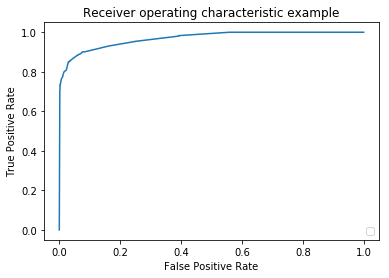

0.968765272207402


In [34]:
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
roc_auc = metrics.auc(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.show()
print(roc_auc)

In [35]:
auc

<function sklearn.metrics.ranking.auc(x, y, reorder='deprecated')>

W0729 15:22:30.081072 140692122953472 deprecation.py:506] From /home/ubuntu/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1236      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0934 - acc: 0.8686 - val_loss: 0.0936 - val_acc: 0.8748
Epoch 51/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0954 - acc: 0.8680 - val_loss: 0.0921 - val_acc: 0.8755
Epoch 52/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0933 - acc: 0.8675 - val_loss: 0.0927 - val_acc: 0.8755
Epoch 53/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0947 - acc: 0.8675 - val_loss: 0.0976 - val_acc: 0.8720
Epoch 54/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0969 - acc: 0.8647 - val_loss: 0.0978 - val_acc: 0.8755
Epoch 55/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0968 - acc: 0.8665 - val_loss: 0.0927 - val_acc: 0.8685
Epoch 56/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0935 - acc: 0.8669 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 57/1000
5153/5153 [=========

5153/5153 [==============================] - 0s 22us/sample - loss: 0.0932 - acc: 0.8676 - val_loss: 0.0929 - val_acc: 0.8708
Epoch 109/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.0940 - acc: 0.8676 - val_loss: 0.0915 - val_acc: 0.8685
Epoch 110/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0937 - acc: 0.8680 - val_loss: 0.0920 - val_acc: 0.8685
Epoch 111/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0930 - acc: 0.8680 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 112/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0932 - acc: 0.8678 - val_loss: 0.0938 - val_acc: 0.8645
Epoch 113/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0931 - acc: 0.8671 - val_loss: 0.0922 - val_acc: 0.8712
Epoch 114/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.0936 - acc: 0.8665 - val_loss: 0.0913 - val_acc: 0.8755
Epoch 115/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8688 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 167/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0929 - acc: 0.8675 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 168/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0925 - acc: 0.8678 - val_loss: 0.0913 - val_acc: 0.8755
Epoch 169/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8676 - val_loss: 0.0922 - val_acc: 0.8685
Epoch 170/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8676 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 171/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0931 - acc: 0.8680 - val_loss: 0.0911 - val_acc: 0.8755
Epoch 172/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0941 - acc: 0.8678 - val_loss: 0.0918 - val_acc: 0.8744
Epoch 173/1000
5153/5153 [==

5153/5153 [==============================] - 0s 22us/sample - loss: 0.0923 - acc: 0.8694 - val_loss: 0.0937 - val_acc: 0.8645
Epoch 225/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.1382 - acc: 0.8071 - val_loss: 0.1183 - val_acc: 0.8685
Epoch 226/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.1030 - acc: 0.8645 - val_loss: 0.0949 - val_acc: 0.8685
Epoch 227/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0948 - acc: 0.8665 - val_loss: 0.0937 - val_acc: 0.8685
Epoch 228/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0958 - acc: 0.8663 - val_loss: 0.0937 - val_acc: 0.8685
Epoch 229/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0936 - acc: 0.8675 - val_loss: 0.0913 - val_acc: 0.8755
Epoch 230/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0935 - acc: 0.8684 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 231/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0924 - acc: 0.8686 - val_loss: 0.0914 - val_acc: 0.8744
Epoch 283/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0930 - acc: 0.8688 - val_loss: 0.0911 - val_acc: 0.8755
Epoch 284/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0924 - acc: 0.8690 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 285/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8700 - val_loss: 0.0912 - val_acc: 0.8716
Epoch 286/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8692 - val_loss: 0.0920 - val_acc: 0.8755
Epoch 287/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8684 - val_loss: 0.0905 - val_acc: 0.8755
Epoch 288/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8690 - val_loss: 0.0915 - val_acc: 0.8716
Epoch 289/1000
5153/5153 [==

5153/5153 [==============================] - 0s 22us/sample - loss: 0.1205 - acc: 0.8638 - val_loss: 0.1174 - val_acc: 0.8681
Epoch 341/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.1166 - acc: 0.8653 - val_loss: 0.1137 - val_acc: 0.8685
Epoch 342/1000
5153/5153 [==============================] - 0s 23us/sample - loss: 0.1132 - acc: 0.8638 - val_loss: 0.1113 - val_acc: 0.8673
Epoch 343/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.1124 - acc: 0.8647 - val_loss: 0.1090 - val_acc: 0.8673
Epoch 344/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.1091 - acc: 0.8644 - val_loss: 0.1065 - val_acc: 0.8637
Epoch 345/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.1048 - acc: 0.8667 - val_loss: 0.1055 - val_acc: 0.8633
Epoch 346/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.1033 - acc: 0.8645 - val_loss: 0.1052 - val_acc: 0.8673
Epoch 347/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0957 - acc: 0.8676 - val_loss: 0.0923 - val_acc: 0.8716
Epoch 399/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0935 - acc: 0.8686 - val_loss: 0.0941 - val_acc: 0.8751
Epoch 400/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0947 - acc: 0.8686 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 401/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0932 - acc: 0.8686 - val_loss: 0.0914 - val_acc: 0.8755
Epoch 402/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0949 - acc: 0.8686 - val_loss: 0.0921 - val_acc: 0.8724
Epoch 403/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0933 - acc: 0.8678 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 404/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0929 - acc: 0.8696 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 405/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0933 - acc: 0.8684 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 457/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0943 - acc: 0.8676 - val_loss: 0.0931 - val_acc: 0.8724
Epoch 458/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0941 - acc: 0.8680 - val_loss: 0.0909 - val_acc: 0.8751
Epoch 459/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0941 - acc: 0.8680 - val_loss: 0.0945 - val_acc: 0.8732
Epoch 460/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0929 - acc: 0.8686 - val_loss: 0.0910 - val_acc: 0.8744
Epoch 461/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0938 - acc: 0.8684 - val_loss: 0.0919 - val_acc: 0.8755
Epoch 462/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0928 - acc: 0.8686 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 463/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0921 - acc: 0.8704 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 515/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0928 - acc: 0.8694 - val_loss: 0.0939 - val_acc: 0.8716
Epoch 516/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0925 - acc: 0.8686 - val_loss: 0.0919 - val_acc: 0.8732
Epoch 517/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0936 - acc: 0.8694 - val_loss: 0.0915 - val_acc: 0.8712
Epoch 518/1000
5153/5153 [==============================] - 0s 20us/sample - loss: 0.0932 - acc: 0.8694 - val_loss: 0.0952 - val_acc: 0.8712
Epoch 519/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0949 - acc: 0.8678 - val_loss: 0.0929 - val_acc: 0.8744
Epoch 520/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0933 - acc: 0.8692 - val_loss: 0.0913 - val_acc: 0.8755
Epoch 521/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0924 - acc: 0.8688 - val_loss: 0.0915 - val_acc: 0.8751
Epoch 573/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0930 - acc: 0.8684 - val_loss: 0.0929 - val_acc: 0.8716
Epoch 574/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0930 - acc: 0.8690 - val_loss: 0.0951 - val_acc: 0.8755
Epoch 575/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0933 - acc: 0.8688 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 576/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0929 - acc: 0.8680 - val_loss: 0.0910 - val_acc: 0.8751
Epoch 577/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0925 - acc: 0.8700 - val_loss: 0.0913 - val_acc: 0.8751
Epoch 578/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0925 - acc: 0.8686 - val_loss: 0.0919 - val_acc: 0.8716
Epoch 579/1000
5153/5153 [==

5153/5153 [==============================] - 0s 22us/sample - loss: 0.0920 - acc: 0.8688 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 631/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0925 - acc: 0.8690 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 632/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0927 - acc: 0.8676 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 633/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8692 - val_loss: 0.0926 - val_acc: 0.8732
Epoch 634/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8686 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 635/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8698 - val_loss: 0.0918 - val_acc: 0.8716
Epoch 636/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.0920 - acc: 0.8688 - val_loss: 0.0915 - val_acc: 0.8755
Epoch 637/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8690 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 689/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8686 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 690/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8692 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 691/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0921 - acc: 0.8680 - val_loss: 0.0905 - val_acc: 0.8755
Epoch 692/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0938 - acc: 0.8682 - val_loss: 0.0912 - val_acc: 0.8724
Epoch 693/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.0921 - acc: 0.8692 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 694/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8682 - val_loss: 0.0907 - val_acc: 0.8755
Epoch 695/1000
5153/5153 [==

5153/5153 [==============================] - 0s 22us/sample - loss: 0.0920 - acc: 0.8684 - val_loss: 0.0924 - val_acc: 0.8755
Epoch 747/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8690 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 748/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0924 - acc: 0.8684 - val_loss: 0.0917 - val_acc: 0.8755
Epoch 749/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8688 - val_loss: 0.0906 - val_acc: 0.8755
Epoch 750/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8690 - val_loss: 0.0914 - val_acc: 0.8712
Epoch 751/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8682 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 752/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8688 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 753/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8686 - val_loss: 0.0919 - val_acc: 0.8755
Epoch 805/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8690 - val_loss: 0.0953 - val_acc: 0.8744
Epoch 806/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8688 - val_loss: 0.0904 - val_acc: 0.8755
Epoch 807/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8688 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 808/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8690 - val_loss: 0.0905 - val_acc: 0.8755
Epoch 809/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0922 - acc: 0.8686 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 810/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8692 - val_loss: 0.0906 - val_acc: 0.8755
Epoch 811/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8696 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 863/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0930 - acc: 0.8690 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 864/1000
5153/5153 [==============================] - 0s 22us/sample - loss: 0.0925 - acc: 0.8682 - val_loss: 0.0909 - val_acc: 0.8755
Epoch 865/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8684 - val_loss: 0.0915 - val_acc: 0.8716
Epoch 866/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0927 - acc: 0.8692 - val_loss: 0.0924 - val_acc: 0.8716
Epoch 867/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0938 - acc: 0.8680 - val_loss: 0.0914 - val_acc: 0.8755
Epoch 868/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8686 - val_loss: 0.0917 - val_acc: 0.8716
Epoch 869/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8692 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 921/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0921 - acc: 0.8684 - val_loss: 0.0905 - val_acc: 0.8755
Epoch 922/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8692 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 923/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8694 - val_loss: 0.0914 - val_acc: 0.8755
Epoch 924/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0926 - acc: 0.8686 - val_loss: 0.0915 - val_acc: 0.8716
Epoch 925/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0929 - acc: 0.8673 - val_loss: 0.0910 - val_acc: 0.8755
Epoch 926/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8692 - val_loss: 0.0922 - val_acc: 0.8716
Epoch 927/1000
5153/5153 [==

5153/5153 [==============================] - 0s 21us/sample - loss: 0.0921 - acc: 0.8686 - val_loss: 0.0908 - val_acc: 0.8755
Epoch 979/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0920 - acc: 0.8686 - val_loss: 0.0904 - val_acc: 0.8755
Epoch 980/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0924 - acc: 0.8686 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 981/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.8702 - val_loss: 0.0913 - val_acc: 0.8716
Epoch 982/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0921 - acc: 0.8688 - val_loss: 0.0912 - val_acc: 0.8755
Epoch 983/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0923 - acc: 0.8704 - val_loss: 0.0947 - val_acc: 0.8716
Epoch 984/1000
5153/5153 [==============================] - 0s 21us/sample - loss: 0.0945 - acc: 0.8667 - val_loss: 0.0915 - val_acc: 0.8748
Epoch 985/1000
5153/5153 [==

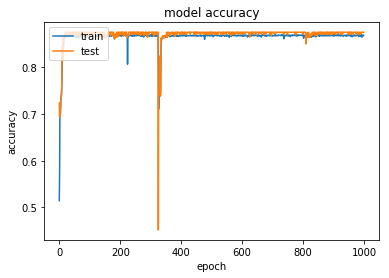

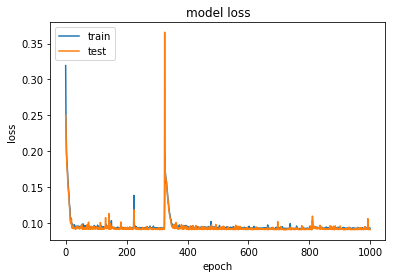

In [36]:
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
# Import `Sequential` from `keras.models`
# Split the Data Set 
X6_train, X6_test, y6_train, y6_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(len(copy_df.columns),)))

# Add one hidden layer 
model.add(Dense(15, activation='relu'))

model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))



model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))


# Add an output layer 
model.add(Dense(1, activation='tanh'))
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X6_train, y6_train,epochs=1000,validation_split=0.33, batch_size=100, verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [37]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
#class probabilites
predicted = model2.predict(X_test)
print('predicted' + str(predicted))
# generate class probabilities
probs = model2.predict_proba(X_test)
print('probs')
print (probs)
# generate evaluation metrics
print('accuacy + roc')
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))
print('confusion+classification')
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), copy_df, target_function_list, scoring='accuracy', cv=10)
print('scores and score mean')
print (scores)
print (scores.mean())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

predicted[0 0 1 ... 0 0 0]
probs
[[0.55188726 0.44811274]
 [0.50631807 0.49368193]
 [0.33692279 0.66307721]
 ...
 [0.5151313  0.4848687 ]
 [0.51953474 0.48046526]
 [0.50631807 0.49368193]]
accuacy + roc
0.6857749469214437
0.6335842244501269
confusion+classification
[[1522  192]
 [ 844  739]]
              precision    recall  f1-score   support

           0       0.64      0.89      0.75      1714
           1       0.79      0.47      0.59      1583

   micro avg       0.69      0.69      0.69      3297
   macro avg       0.72      0.68      0.67      3297
weighted avg       0.72      0.69      0.67      3297

scores and score mean
[0.73272727 0.56727273 0.68971793 0.62602366 0.48680619 0.54413103
 0.6232939  0.2704918  0.52550091 0.35428051]
0.5420245926500495


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
print(len('data/data/2019-04-18/enrichment/cert_info/1.json'))

48


Feature ranking:
1. feature 0 (0.666320)
2. feature 100 (0.333680)
3. feature 48 (0.000000)
4. feature 47 (0.000000)
5. feature 26 (0.000000)
6. feature 27 (0.000000)
7. feature 28 (0.000000)
8. feature 29 (0.000000)
9. feature 30 (0.000000)
10. feature 31 (0.000000)
11. feature 32 (0.000000)
12. feature 33 (0.000000)
13. feature 34 (0.000000)
14. feature 35 (0.000000)
15. feature 36 (0.000000)
16. feature 25 (0.000000)
17. feature 38 (0.000000)
18. feature 39 (0.000000)
19. feature 40 (0.000000)
20. feature 41 (0.000000)
21. feature 42 (0.000000)
22. feature 43 (0.000000)
23. feature 44 (0.000000)
24. feature 45 (0.000000)
25. feature 46 (0.000000)
26. feature 37 (0.000000)
27. feature 24 (0.000000)
28. feature 23 (0.000000)
29. feature 22 (0.000000)
30. feature 1 (0.000000)
31. feature 2 (0.000000)
32. feature 3 (0.000000)
33. feature 4 (0.000000)
34. feature 5 (0.000000)
35. feature 6 (0.000000)
36. feature 7 (0.000000)
37. feature 8 (0.000000)
38. feature 9 (0.000000)
39. feature 1

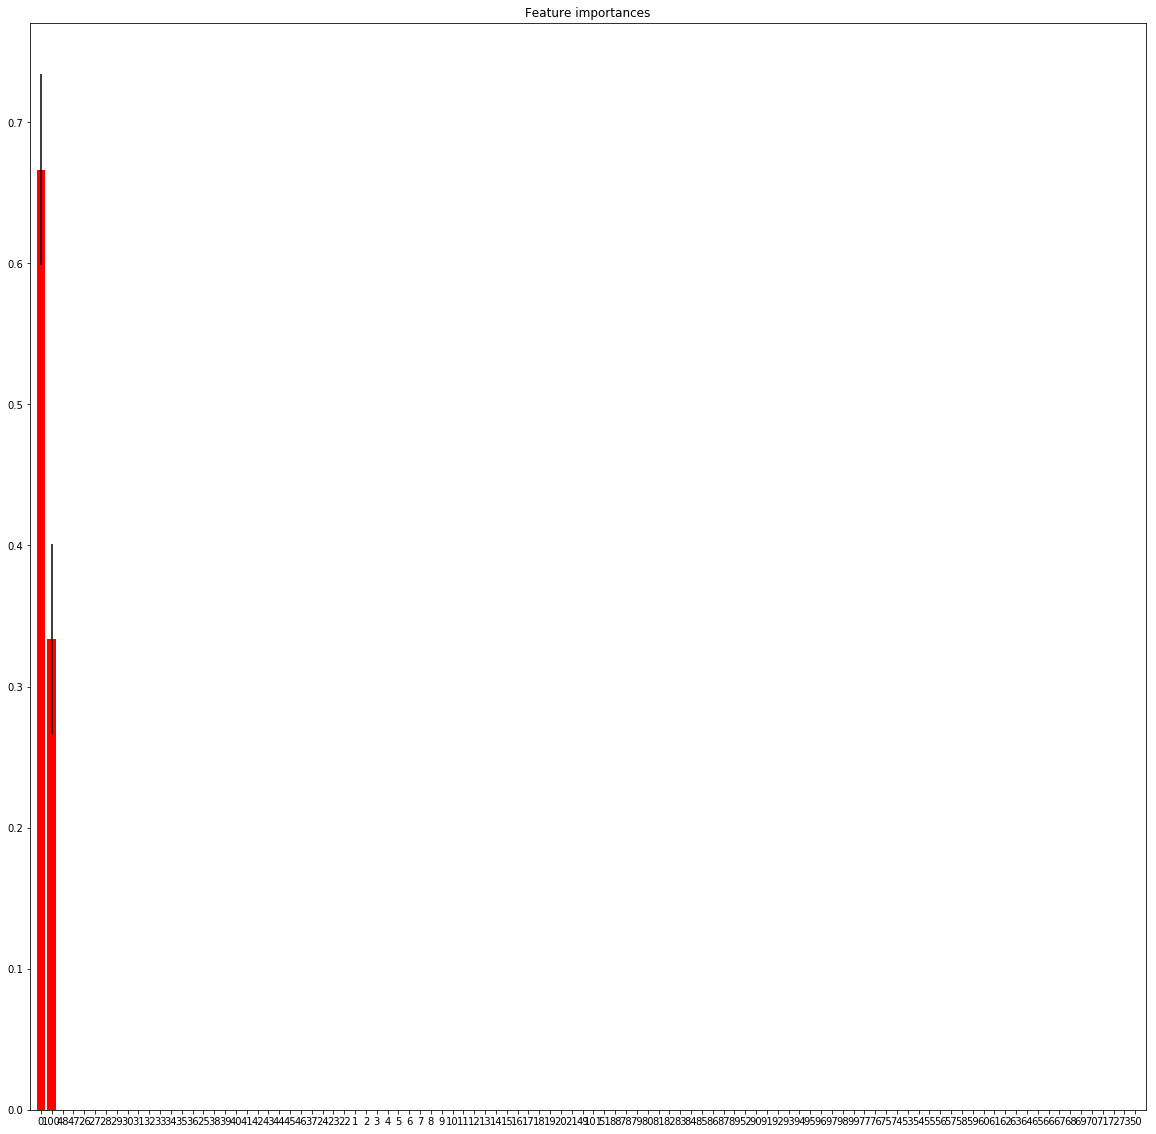

In [39]:
importances = ranFor.feature_importances_
std = np.std([tree.feature_importances_ for tree in ranFor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X2_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2_train.shape[1]), indices)
plt.xlim([-1, X2_train.shape[1]])
plt.show()


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(copy3_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y3_score=ranFor.fit(X3_train,y3_train)
y3_pred=ranFor.predict(X3_test)

print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))

print (metrics.confusion_matrix(y3_test, y3_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y3_test, y3_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.8604792235365484
[[1683   31]
 [ 429 1154]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1714
           1       0.97      0.73      0.83      1583

   micro avg       0.86      0.86      0.86      3297
   macro avg       0.89      0.86      0.86      3297
weighted avg       0.88      0.86      0.86      3297



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.92098093 0.88283379 0.91553134 0.94277929 0.91280654 0.92915531
 0.9400545  0.9400545  0.91280654 0.89100817 0.95367847 0.86103542
 0.89071038 0.94535519 0.92076503 0.92076503 0.93442623 0.89071038
 0.91530055 0.81967213 0.90710383 0.88797814 0.92349727 0.88797814
 0.91803279 0.94535519 0.89071038 0.8739726  0.90410959 0.89315068]
0.9090772776030119


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
X7_train, X7_test, y7_train, y7_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)
optimized_GBM.fit(X7_train, y7_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
y7_pred=optimized_GBM.predict(X7_test)

print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))

print (metrics.confusion_matrix(y7_test, y7_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print (metrics.classification_report(y7_test, y7_pred))

Accuracy: 0.9126478616924477
[[1612  102]
 [ 186 1397]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1714
           1       0.93      0.88      0.91      1583

   micro avg       0.91      0.91      0.91      3297
   macro avg       0.91      0.91      0.91      3297
weighted avg       0.91      0.91      0.91      3297

